# Analysis Notebook (Module 4)
## Prepare Data
### Read CVS Files into DataFrames

In [7]:
# Initial Imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [8]:
whale_returns_path = Path("/Users/orlando/Desktop/csv/whale_returns.csv")
algo_returns_path = Path("/Users/orlando/Desktop/csv/algo_returns.csv")

In [9]:
whale_returns = pd.read_csv(whale_returns_path, index_col='Date', parse_dates=True,infer_datetime_format=True)
algo_returns = pd.read_csv(algo_returns_path, index_col='Date', parse_dates=True,infer_datetime_format=True)

### Identify and Remove Null Values
#### Whale and Algo

In [10]:
whale_returns.shape

(1060, 4)

In [11]:
whale_returns.head(5)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [12]:
whale_returns.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [13]:
whale_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [14]:
whale_returns.dropna();

In [15]:
whale_returns.dropna(inplace=True)

In [16]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [17]:
whale_returns.drop_duplicates(inplace=True)

In [18]:
whale_returns.sort_index(inplace=True)

In [19]:
whale_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

In [20]:
algo_returns.shape

(1241, 2)

In [21]:
algo_returns.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [22]:
algo_returns.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [23]:
algo_returns.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [24]:
algo_returns.dropna();

In [25]:
algo_returns.dropna(inplace=True)

In [26]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [27]:
algo_returns.drop_duplicates(inplace=True)

In [28]:
algo_returns.sort_index(inplace=True)

In [29]:
algo_returns.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## Coverting the S&P TSX 60 Closing Prices to Daily Returns
#### S&P TSX 60 Index

In [30]:
sp_tsx_path = Path("/Users/orlando/Desktop/csv/sp_tsx_history.csv")
sp_tsx = pd.read_csv(sp_tsx_path)
sp_tsx = pd.read_csv(sp_tsx_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp_tsx.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [31]:
sp_tsx["Close"] = sp_tsx["Close"].str.replace(",", "")
sp_tsx["Close"] = sp_tsx["Close"].str.replace("$", "")
sp_tsx["Close"].dtypes

/var/folders/kv/cbsjshzs5qgg717f8lb5wmmm0000gn/T/ipykernel_27303/3327513108.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx["Close"] = sp_tsx["Close"].str.replace("$", "")


dtype('O')

In [32]:
sp_tsx['Close'].astype('str');

In [33]:
sp_tsx["Close"] = sp_tsx["Close"].astype("float")

In [34]:
sp_tsx.dtypes

Close    float64
dtype: object

In [35]:
sp_return = sp_tsx.pct_change()
sp_return.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305

In [36]:
sp_return.count()

Close    1817
dtype: int64

In [37]:
sp_return.isnull().mean() * 100

Close    0.055006
dtype: float64

In [38]:
sp_return.dropna();

In [39]:
sp_return.dropna(inplace=True)

In [40]:
sp_return.isnull().sum()

Close    0
dtype: int64

In [41]:
sp_return.drop_duplicates(inplace=True)

In [42]:
sp_return.sort_index(inplace=True)

In [43]:
sp_return.columns=['S&P TSX']

In [44]:
sp_return.head()

S&P TSX
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709

## Joining All Returns into a Single Dataframe

In [45]:
combined_df = pd.concat([whale_returns, algo_returns, sp_return], axis="columns", join="inner")
combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P TSX  
Date                            
2015-03-03 -0.000949 -0.008530  
2015-03-04  0.002416 -0.003371  
2015-03-05  0.004323  0.001344  
2015-03-06 -0.011460 -0.009972  
2015-03-09  0.001303 -0.006555

# Perform Quantitative Analysis
## Performance Analysis

### Calculate and Plot Daily Returns of All Portfolios

In [46]:
daily_returns = combined_df.pct_change()
daily_returns = pd.concat([whale_returns, algo_returns, sp_return], axis="columns", join="inner")
daily_returns.sort_index()
daily_returns.columns=["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P TSX"]
daily_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
Date                                                       
2015-03-03                  -0.001266          -0.004981   
2015-03-04                   0.002230           0.003241   
2015-03-05                   0.004016           0.004076   
2015-03-06                  -0.007905          -0.003574   
2015-03-09                   0.000582           0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P TSX  
Date                            
2015-03-03 -0.000949 -0.008530  
2015-03-04  0.002416 -0.003371  
2015-03-05  0.004323  0.001344  
2015-03-06 -0.011460 -0.009972  
2015-03-09  0.001303 -0.006555

<AxesSubplot:title={'center':'Daily Returns of all portfolios'}, xlabel='Date'>

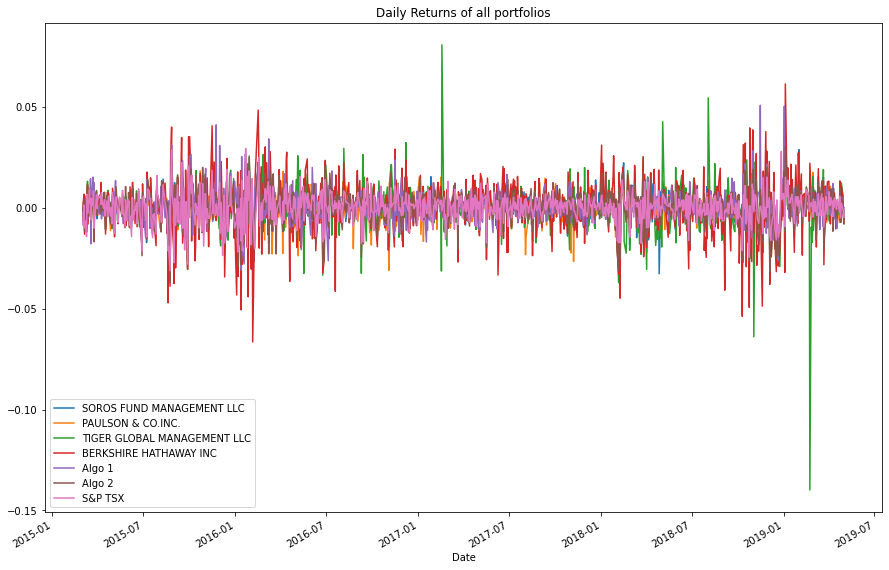

In [47]:
daily_returns.plot(figsize=(15,10), title="Daily Returns of all portfolios")

### Whale Daily Returns

In [48]:
whale_dr = whale_returns.pct_change()
whale_dr.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                  -2.762070           -1.650792   
2015-03-05                   0.800968            0.257544   
2015-03-06                  -2.968465           -1.876837   
2015-03-09                  -1.073656           -2.182252   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                          NaN                     NaN  
2015-03-04                     4.113646               -1.641381  
2015-03-05                    -1.929234                0.596558  
2015-03-06                    -4.601872               -2.947282  
2015-03-09                    -1.688907               -0.873840

In [49]:
whale_dr.isnull();

In [50]:
whale_dr.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.097943
PAULSON & CO.INC.              0.097943
TIGER GLOBAL MANAGEMENT LLC    0.097943
BERKSHIRE HATHAWAY INC         0.097943
dtype: float64

In [51]:
whale_dr = whale_returns.dropna();

In [52]:
whale_dr.dropna(inplace=True)

In [53]:
whale_dr.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

<AxesSubplot:title={'center':'Daily Returns of Whale Portfolio'}, xlabel='Date'>

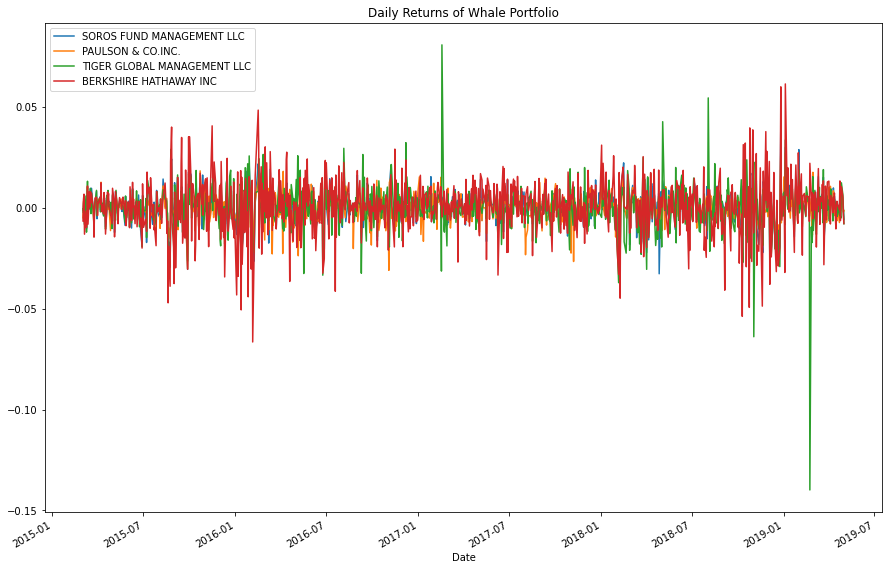

In [54]:
whale_dr.plot(figsize=(15,10), title="Daily Returns of Whale Portfolio")

##### Algorithmic Daily Returns

In [55]:
algo_dr = algo_returns.pct_change()
algo_dr.head()

Algo 1    Algo 2
Date                          
2014-06-05       NaN       NaN
2014-06-06 -0.542965 -0.376459
2014-06-09 -3.699288 -0.315757
2014-06-10 -1.879164 -1.129760
2014-06-11  0.080354  4.113963

In [56]:
algo_dr.isnull();

In [57]:
algo_dr.isnull().mean()*100

Algo 1    0.080972
Algo 2    0.080972
dtype: float64

In [58]:
algo_dr = algo_returns.dropna()

In [59]:
algo_dr.dropna(inplace=True)

In [60]:
algo_dr.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [61]:
algo_dr.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

<AxesSubplot:title={'center':'Daily Returns of Algorithmic Portfolio'}, xlabel='Date'>

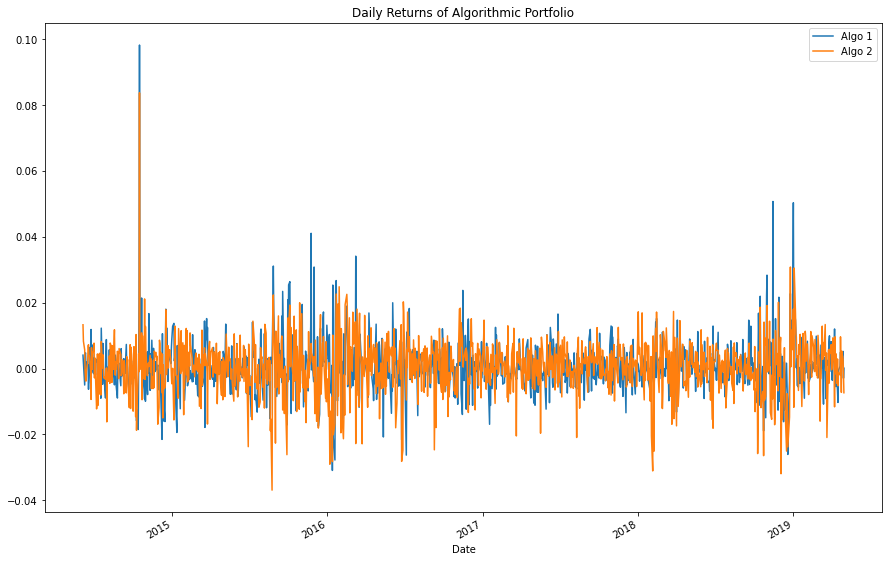

In [62]:
algo_dr.plot(figsize=(15,10), title="Daily Returns of Algorithmic Portfolio")

##### S&P TSX 60 Daily Returns

In [63]:
sp_dr = sp_return.pct_change()
sp_dr.head()

S&P TSX
Date                
2012-10-02       NaN
2012-10-03 -2.506943
2012-10-04 -3.784530
2012-10-05 -1.322942
2012-10-09  4.080375

In [64]:
sp_dr.isnull();

In [65]:
sp_dr.isnull().mean()*100

S&P TSX    0.055036
dtype: float64

In [66]:
sp_dr = sp_return.dropna()

In [67]:
sp_dr.dropna(inplace=True)

In [68]:
sp_dr.isnull().sum()

S&P TSX    0
dtype: int64

In [69]:
sp_dr.head()

S&P TSX
Date                
2012-10-02  0.001701
2012-10-03 -0.002563
2012-10-04  0.007137
2012-10-05 -0.002305
2012-10-09 -0.011709

<AxesSubplot:title={'center':'Daily Returns of S&P TSX 60 Portfolio'}, xlabel='Date'>

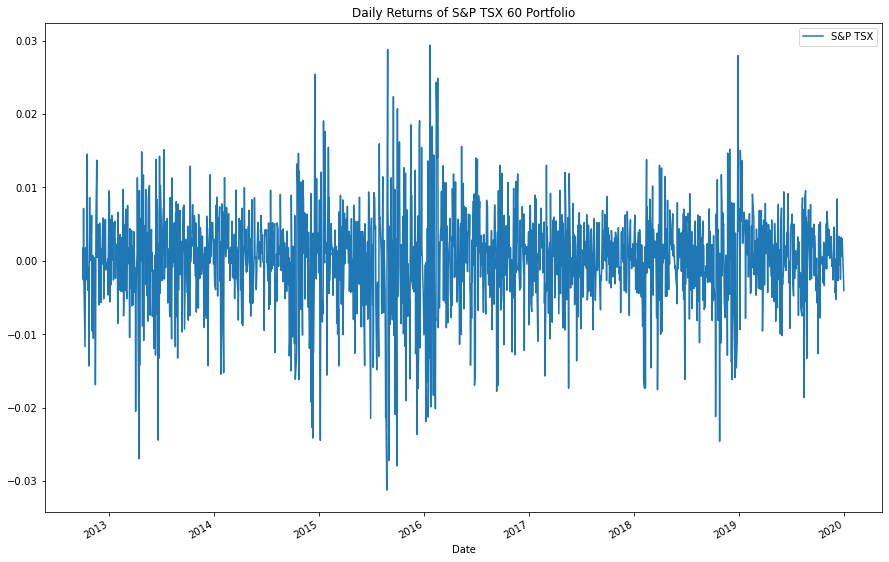

In [70]:
sp_dr.plot(figsize=(15,10), title="Daily Returns of S&P TSX 60 Portfolio")

### Calculate and Plot Cumulative Returns 
#### All Portfolios

In [71]:
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
Date                                                       
2015-03-03                  -0.001266          -0.004981   
2015-03-04                   0.000962          -0.001755   
2015-03-05                   0.004981           0.002314   
2015-03-06                  -0.002963          -0.001269   
2015-03-09                  -0.002383           0.002951   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.003028               -0.002383 -0.010514   
2015-03-05                    -0.000681                0.004327 -0.011459   
2015-03-06                    -0.009156               -0.008828 -0.016359   
2015-03-09                    -0.003367               -0.010466 -0.021717   

              Algo 2   S&P TSX  
Date                            
2015-03-03 -0.000949 -0.008530  
2015-03-04  0.001464 -0.011872  
2015-03-05  0.005794 -0.010544  
2015-03-06 -0.005733 -0.020411  
2015-03-09 -0.004437 -0.026832

<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

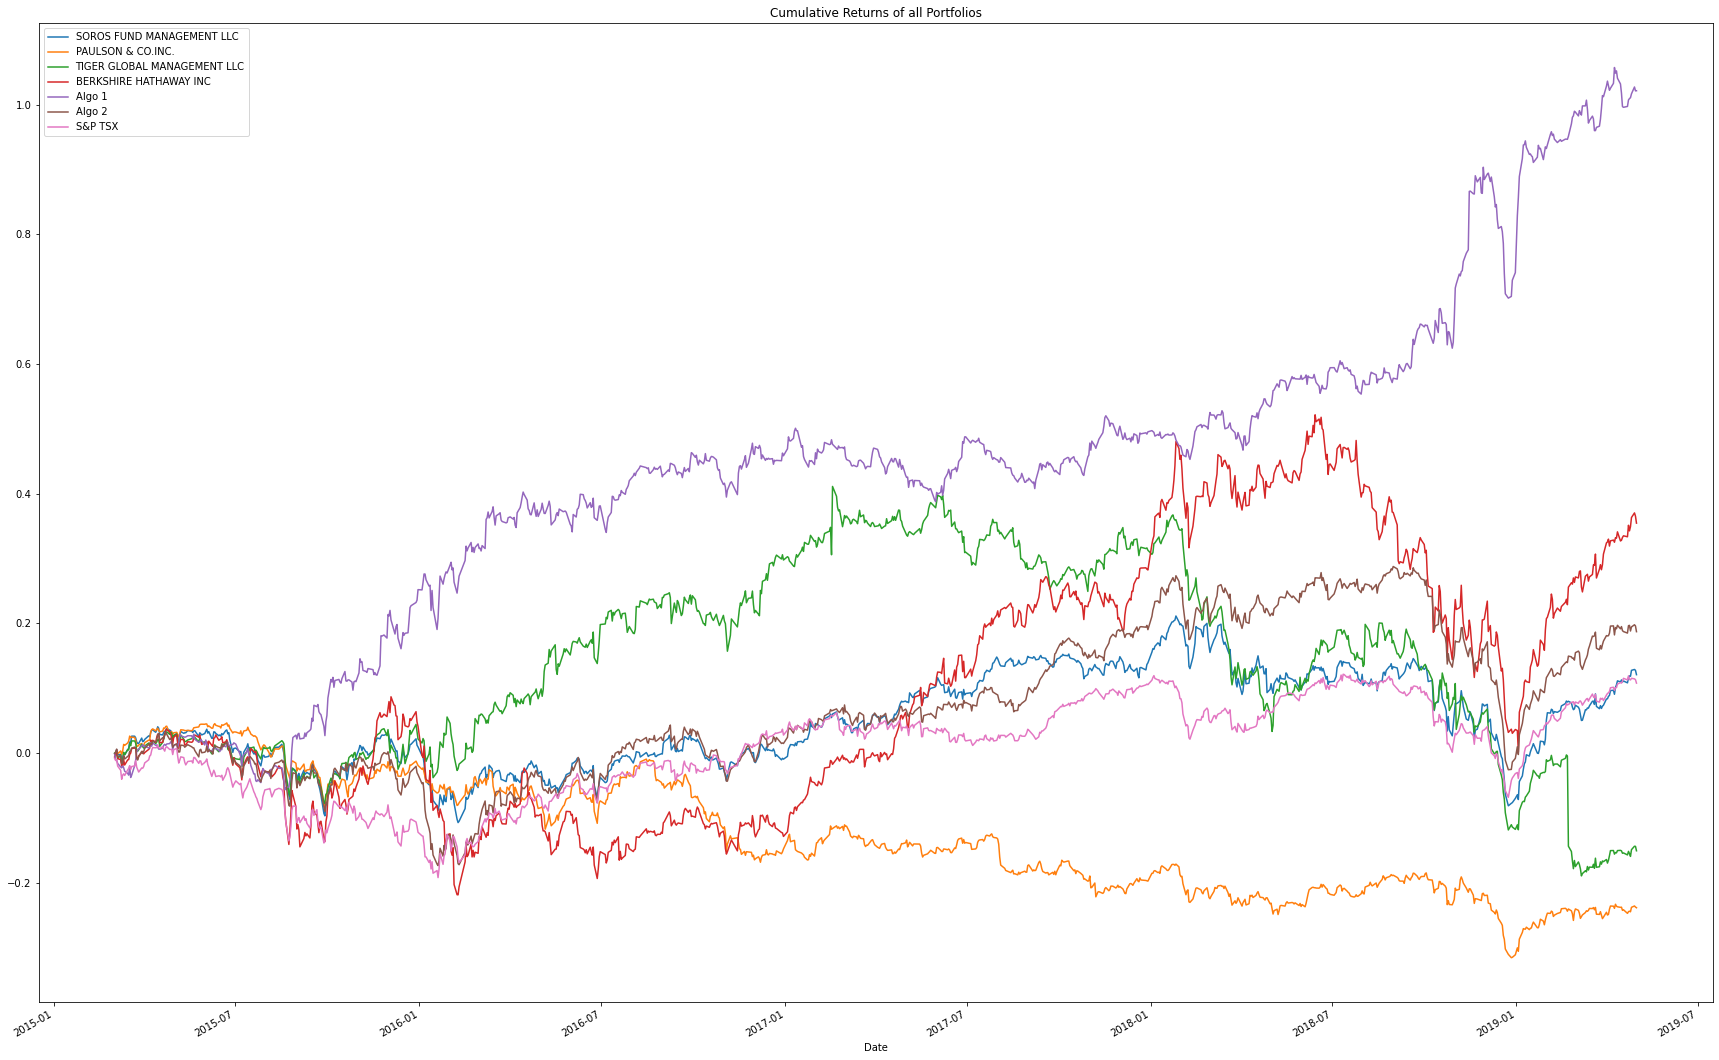

In [72]:
cumulative_returns.plot(figsize=(30,20), title="Cumulative Returns of all Portfolios")

#### Whale Portfolio

In [73]:
whale_cumulative_returns = (1 + whale_dr).cumprod() - 1
whale_cumulative_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.000962           -0.001755   
2015-03-05                   0.004981            0.002314   
2015-03-06                  -0.002963           -0.001269   
2015-03-09                  -0.002383            0.002951   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.003028               -0.002383  
2015-03-05                    -0.000681                0.004327  
2015-03-06                    -0.009156               -0.008828  
2015-03-09                    -0.003367               -0.010466

<AxesSubplot:title={'center':'Cumulative Returns of Whale Portfolio'}, xlabel='Date'>

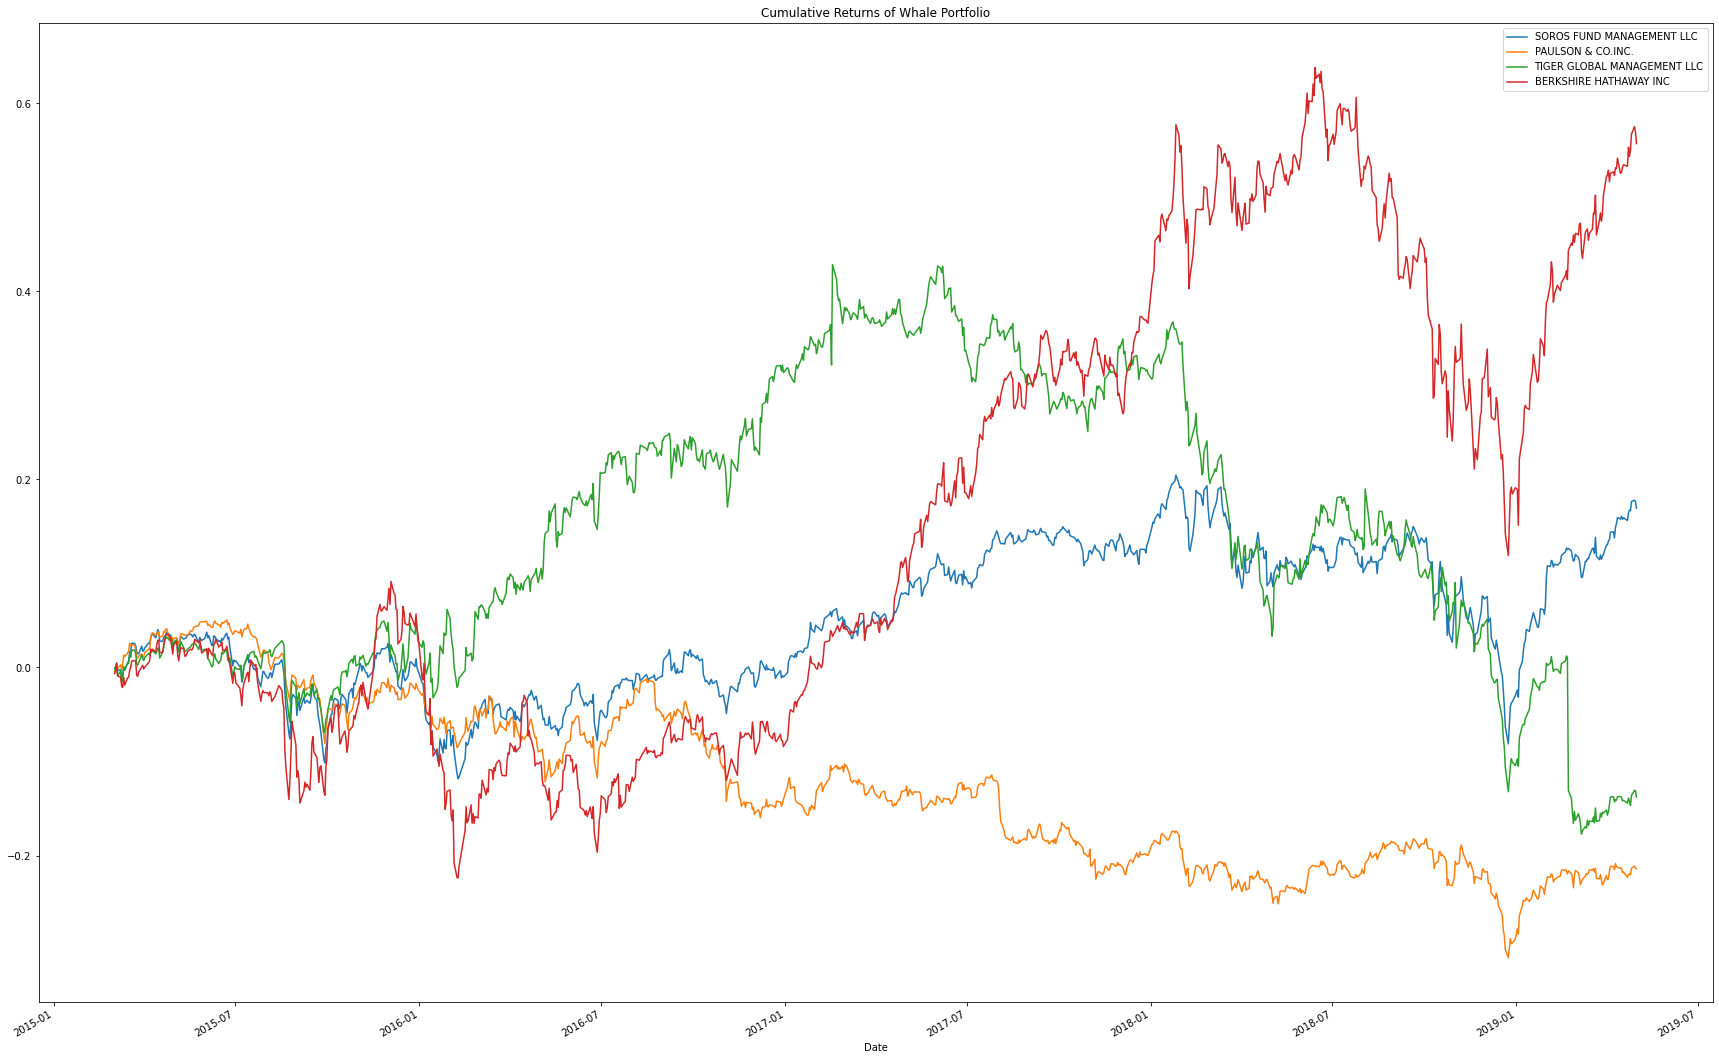

In [74]:
whale_cumulative_returns.plot(figsize=(30,20), title="Cumulative Returns of Whale Portfolio")

#### Algorithmic Cumulative Returns

In [75]:
algo_cumulative_returns = (1 + algo_dr).cumprod() - 1
algo_cumulative_returns.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.005927  0.021679
2014-06-09  0.000885  0.027470
2014-06-10  0.005295  0.026714
2014-06-11  0.010081  0.022852

<AxesSubplot:title={'center':'Cumulative Returns of Algo Portfolio'}, xlabel='Date'>

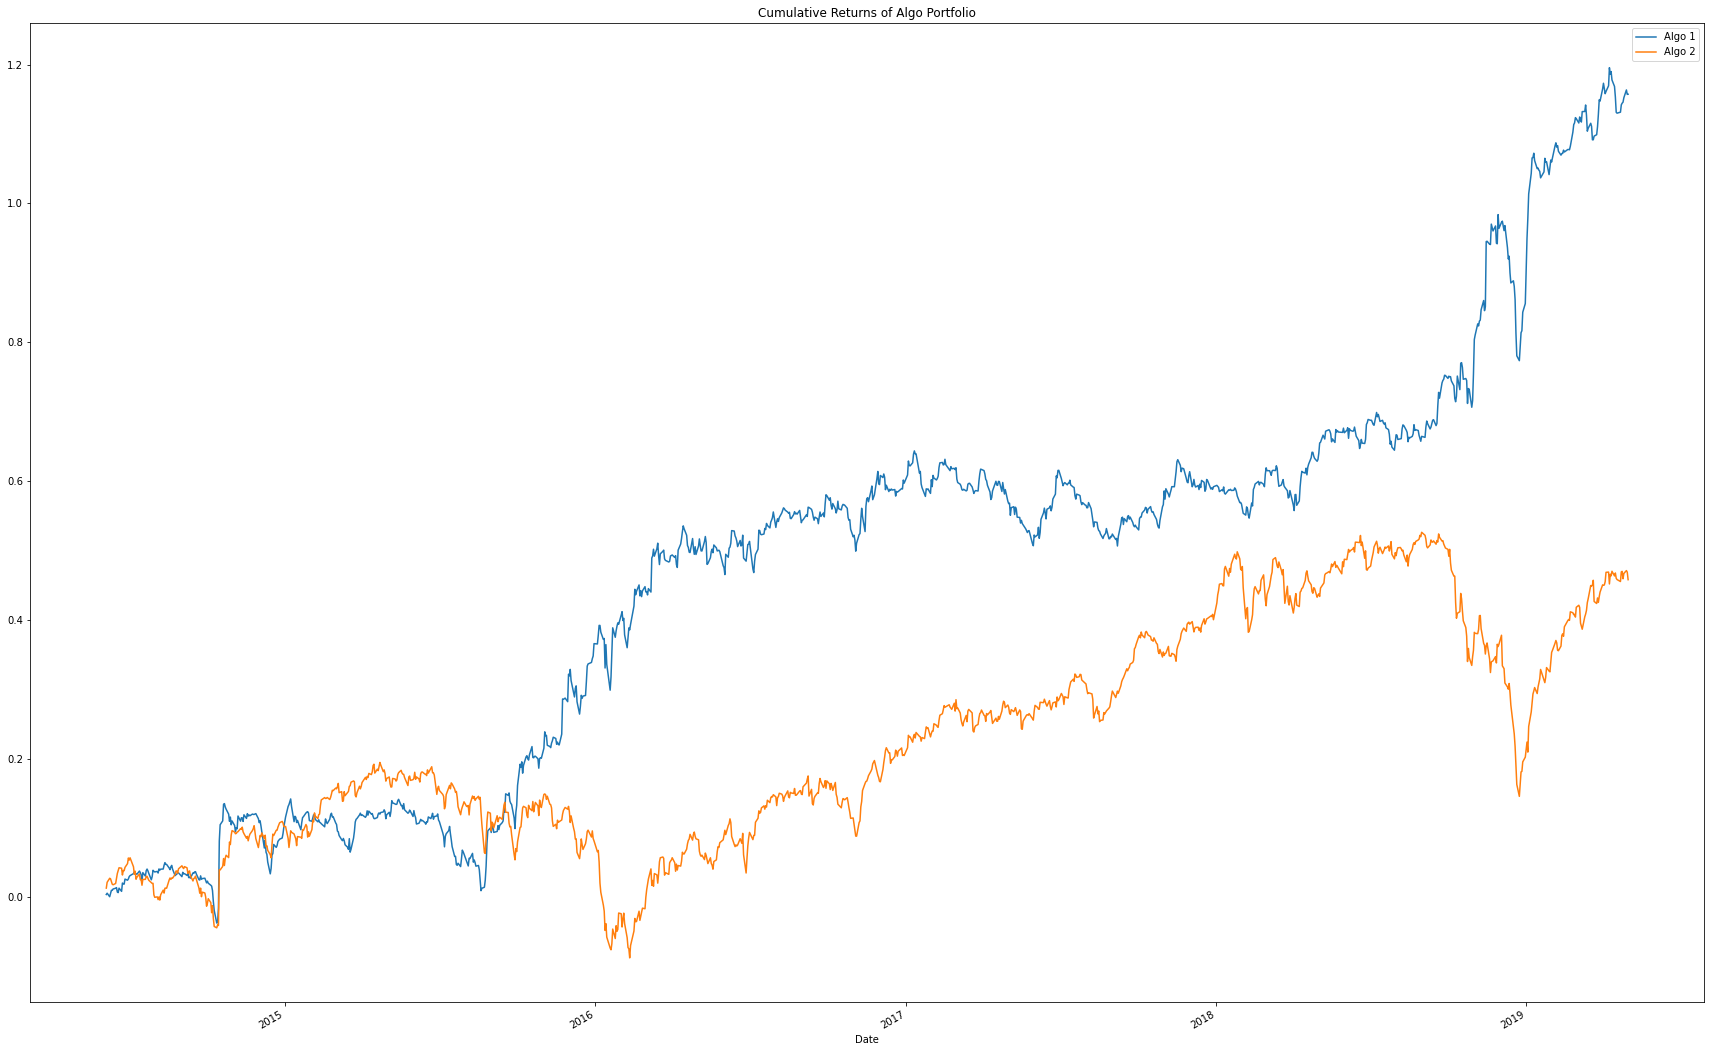

In [76]:
algo_cumulative_returns.plot(figsize=(30,20), title="Cumulative Returns of Algo Portfolio")

#### S&P TSX 60 Cumulative Returns

In [77]:
sp_cumulative_returns = (1 + sp_dr).cumprod() - 1
sp_cumulative_returns.head()

S&P TSX
Date                
2012-10-02  0.001701
2012-10-03 -0.000867
2012-10-04  0.006264
2012-10-05  0.003945
2012-10-09 -0.007811

<AxesSubplot:title={'center':'Cumulative Returns of S&P TSX 60 Portfolio'}, xlabel='Date'>

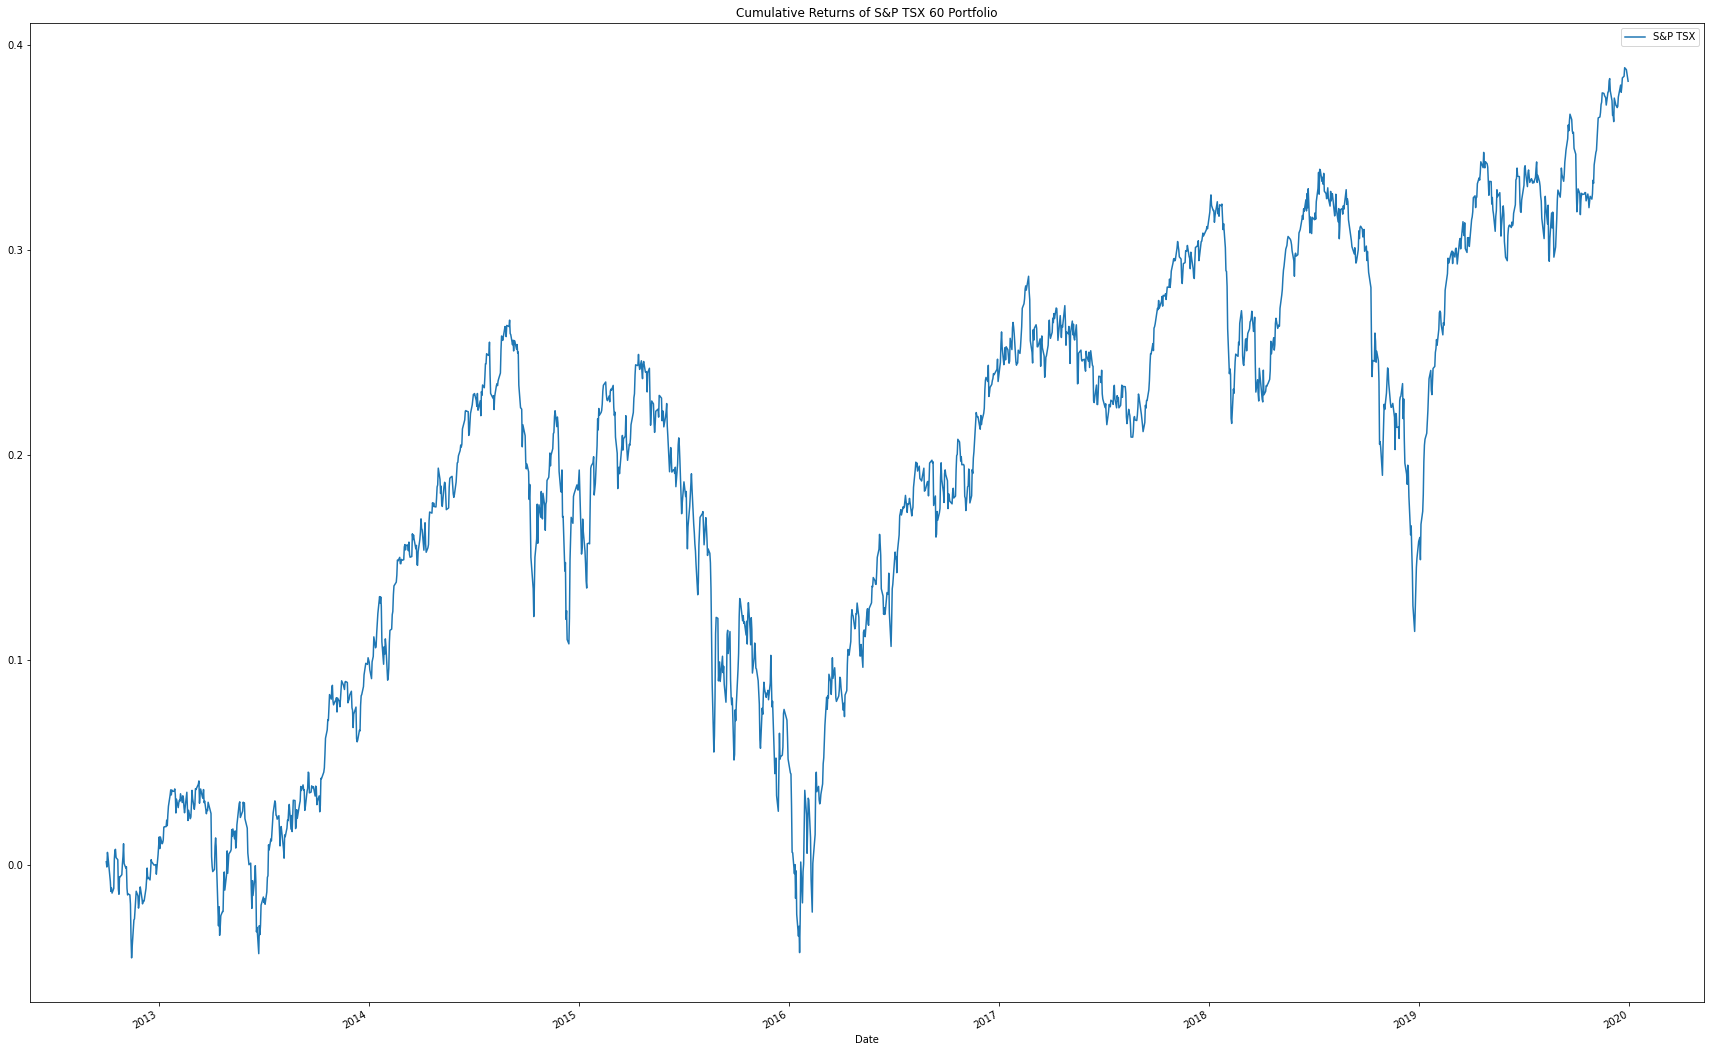

In [78]:
sp_cumulative_returns.plot(figsize=(30,20), title="Cumulative Returns of S&P TSX 60 Portfolio")

### Do any portfolio's outperform the S&P TSX 60

#### No, it the portfolios can be observed as underperforming in regard to the S&P TSX 60. With reference to the "Cumulative Returns of all Portfolios" plot graph, the S&P presented the highest concentration over the period, with a low proporation of deviation. The results confirm that the S&P TSX 60 continued to produce a fairly constricted portfolio earning. Whilst the Whales Portfolio produced great deviation throughout each company, most notably, TIGER GLOBAL MANAGEMENT LLC, having very high disparity between other portfolios and companies. The Algorithmic Portfolio, producing efficient results, with two notable changes in returns. However, it must be noted that, the S&P TSX 60's Portfolio, produces much higher returns, with very little negative values in comparison to both the Whale and Algorithmic Portfolio.

## Risk Analysis

### Box Plot's for Returns

##### Whale Box Plot
###### Box Plot
###### Standard Deviation
###### Annualised Deviation

<AxesSubplot:title={'center':'Daily Returns of Whale Portfolio Box Plot'}>

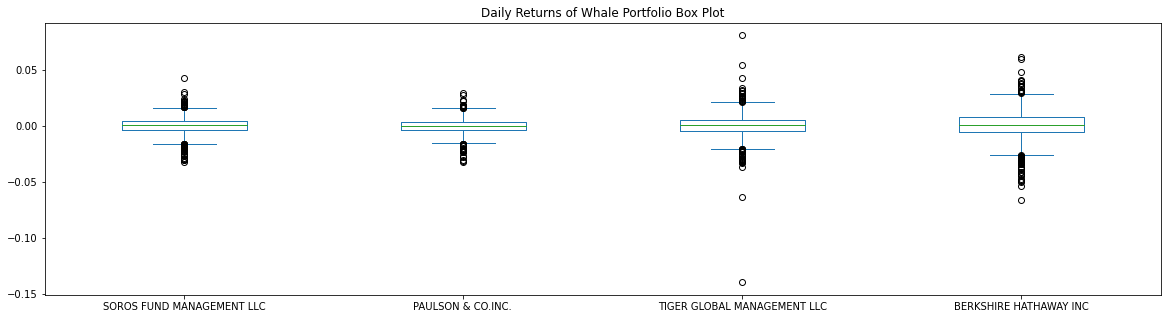

In [79]:
whale_dr.plot.box(figsize=(20,5), title="Daily Returns of Whale Portfolio Box Plot")

In [80]:
whale_std = whale_cumulative_returns.std()

<AxesSubplot:title={'center':'Standard Devation of Whale Portfolio'}>

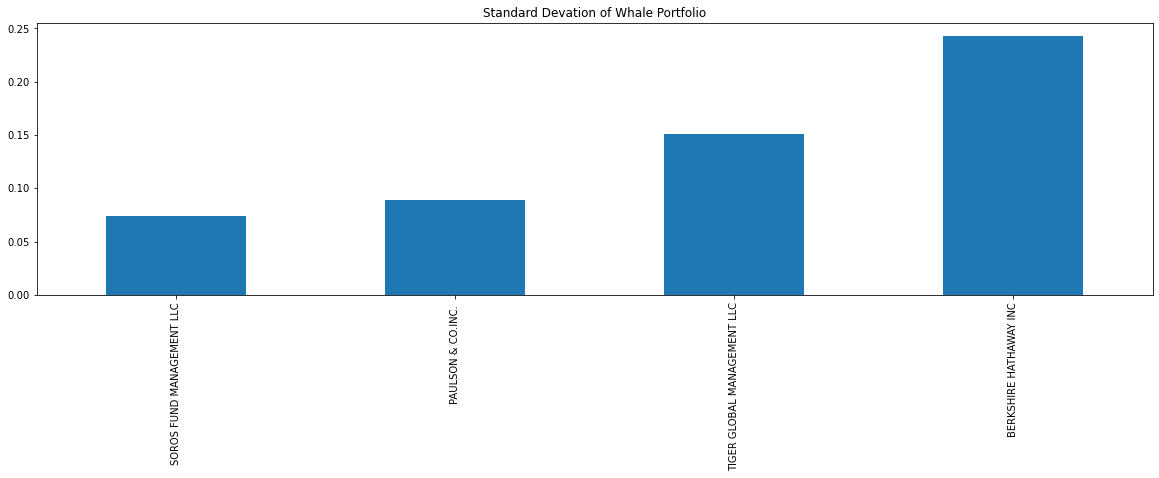

In [81]:
whale_std.plot.bar(figsize=(20,5), title="Standard Devation of Whale Portfolio")

<AxesSubplot:title={'center':"Annual Standard Deviation of Whale's Portfolio"}, xlabel='Date'>

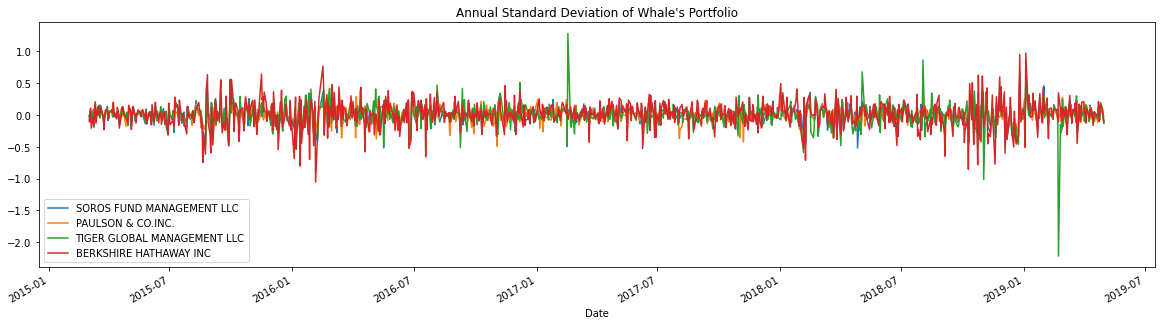

In [82]:
whale_annual_std = whale_dr*np.sqrt(252)
whale_annual_std.plot(figsize=(20,5), title="Annual Standard Deviation of Whale's Portfolio")

##### Algorithmic
###### Box Plot
###### Standard Deviation
###### Annualised Deviation

<AxesSubplot:title={'center':'Daily Returns of Algorithmic Portfolio Box Plot'}>

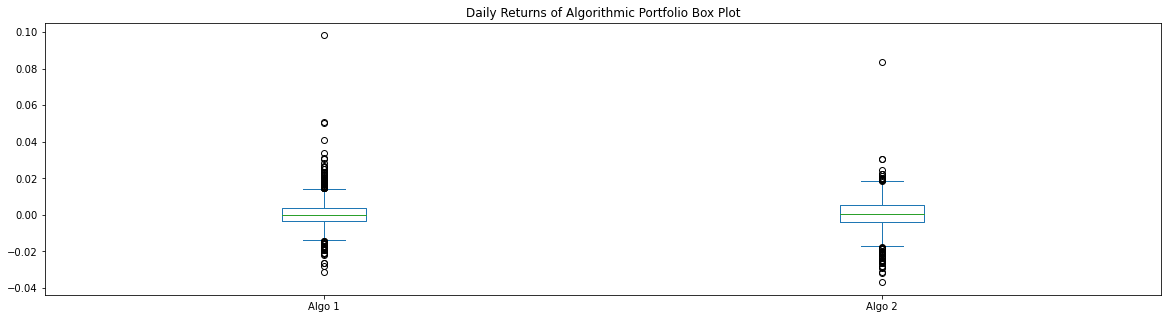

In [83]:
algo_dr.plot.box(figsize=(20,5), title="Daily Returns of Algorithmic Portfolio Box Plot")

In [84]:
algo_std = algo_cumulative_returns.std()

<AxesSubplot:title={'center':'Standard Devation of Algorithmic Portfolio'}>

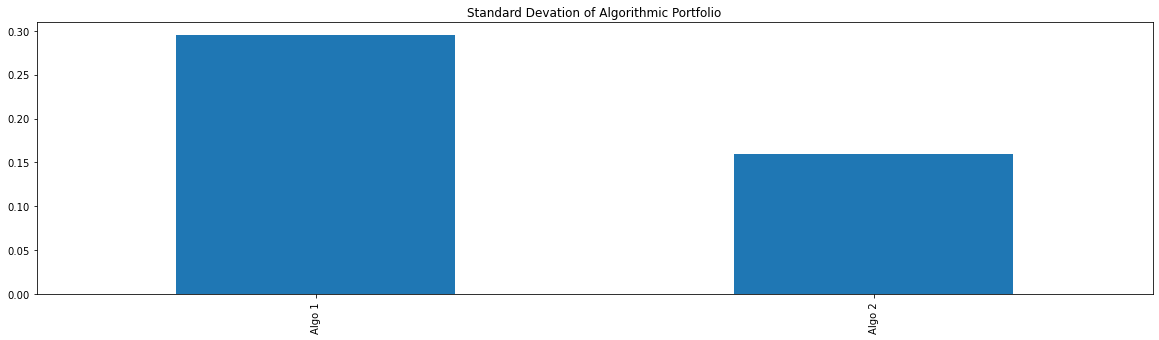

In [85]:
algo_std.plot.bar(figsize=(20,5), title="Standard Devation of Algorithmic Portfolio")

<AxesSubplot:title={'center':'Annual Standard Deviation of Algorithmic Portfolio'}, xlabel='Date'>

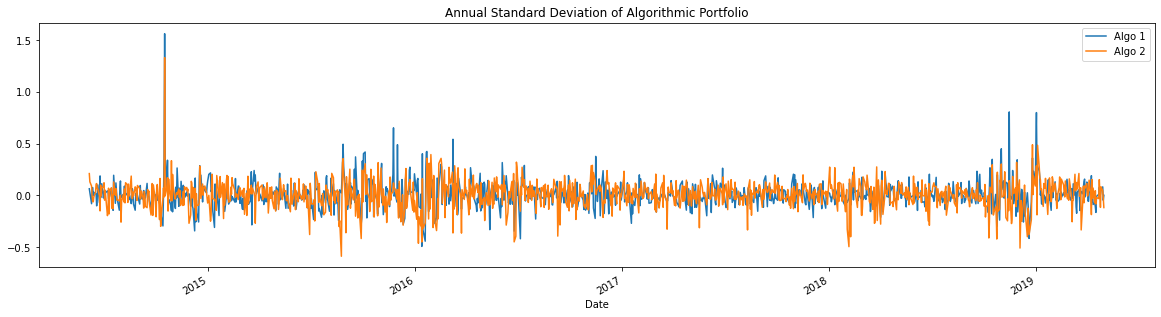

In [86]:
algo_annual_std = algo_dr*np.sqrt(252)
algo_annual_std.plot(figsize=(20,5), title="Annual Standard Deviation of Algorithmic Portfolio")

##### S&P TSX 60 Box Plot
###### Box Plot
###### Standard Deviation
###### Annualised Deviation

<AxesSubplot:title={'center':'Daily Returns of S&P TSX 60 Portfolio Box Plot'}>

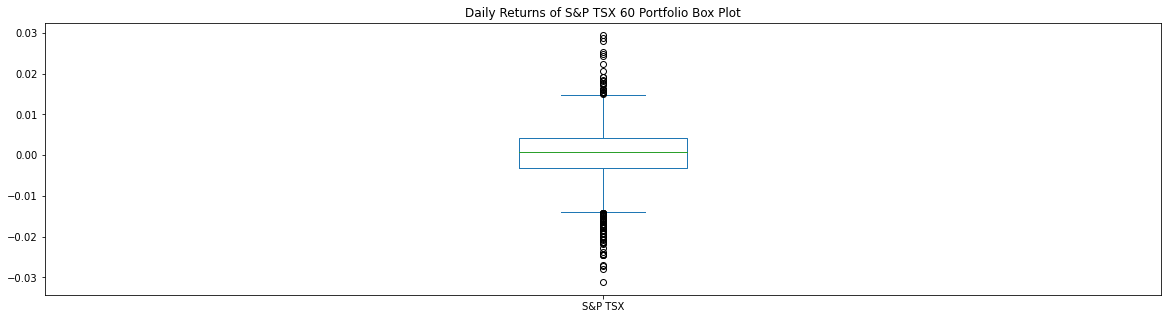

In [87]:
sp_dr.plot.box(figsize=(20,5), title="Daily Returns of S&P TSX 60 Portfolio Box Plot")

In [88]:
sp_std = sp_cumulative_returns.std()

<AxesSubplot:title={'center':'Standard Devation of S&P TSX 60 Portfolio'}>

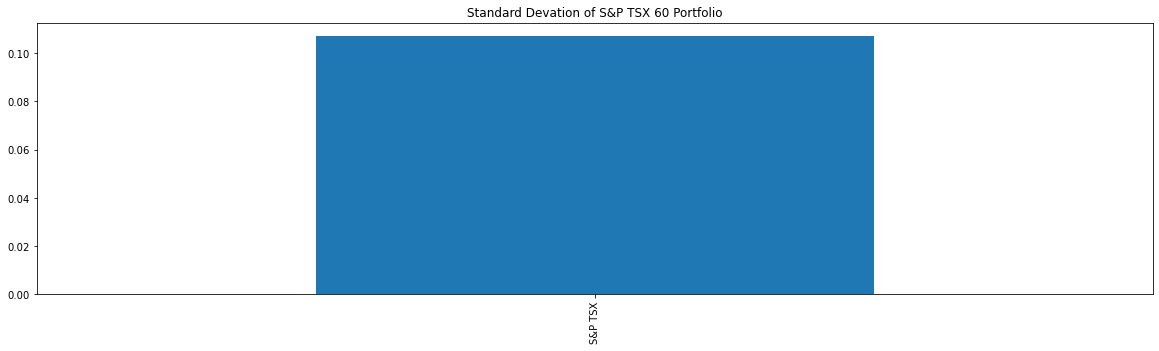

In [89]:
sp_std.plot.bar(figsize=(20,5), title="Standard Devation of S&P TSX 60 Portfolio")

<AxesSubplot:title={'center':'Annual Standard Deviation of S&P TSX 60 Portfolio'}, xlabel='Date'>

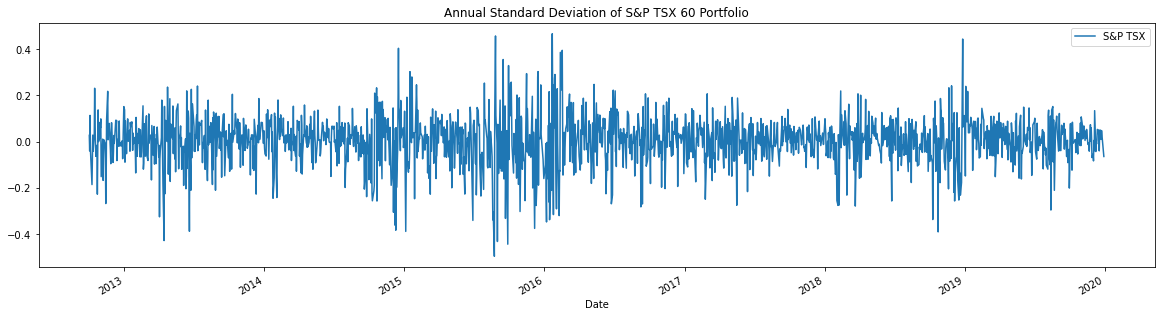

In [90]:
sp_annual_std = sp_dr*np.sqrt(252)
sp_annual_std.plot(figsize=(20,5), title="Annual Standard Deviation of S&P TSX 60 Portfolio")

### Which Portfolio are riskier than the S&P TSX 60

##### The Whale Portfolio depicts larger standard deviation values, which suggests that the data within each returns subset is widley spread, deaming the portfolio to be less reliable than that of the S&P TSX 60 portfolio which yields a more reliable and clustered portfolio.

### Annualised Standard Deviation for All Portfolios

<AxesSubplot:title={'center':"Annual Standard Devation of all Portfolio's"}>

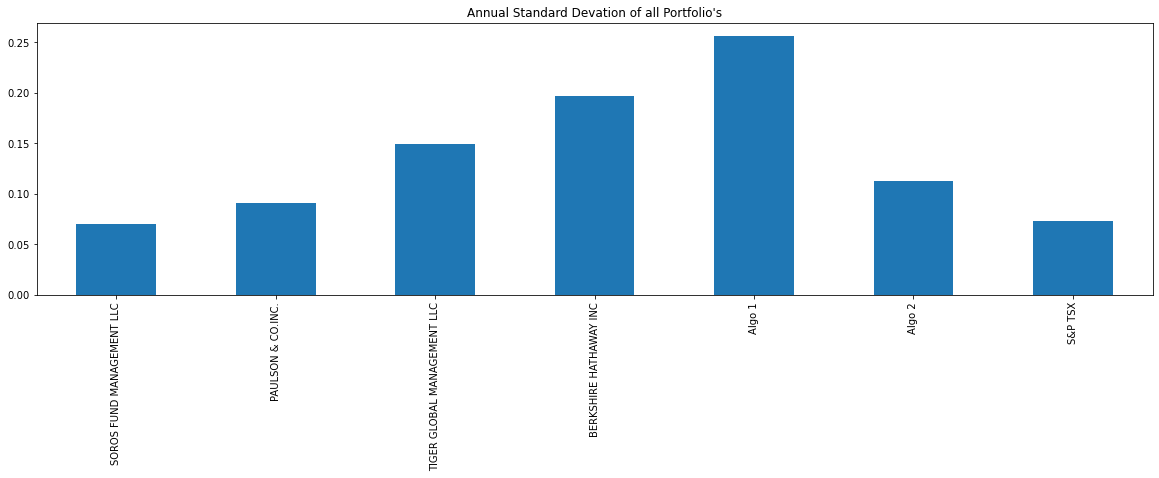

In [91]:
annualised_std = cumulative_returns.std()
annualised_std.columns=["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P TSX"]
annualised_std.plot.bar(figsize=(20,5), title="Annual Standard Devation of all Portfolio's")

In [92]:
annualised_std.head()

SOROS FUND MANAGEMENT LLC      0.070288
PAULSON & CO.INC.              0.090815
TIGER GLOBAL MANAGEMENT LLC    0.149047
BERKSHIRE HATHAWAY INC         0.196918
Algo 1                         0.256468
dtype: float64

## Rolling Statistics

### Calculate and Plot the Rolling Standard Deviation for all Portfolios (21-day window)
#### All Portfolios

##### Whale Rolling Standard Deviation

<AxesSubplot:title={'center':"Whale's Rolling Standard Deviation"}, xlabel='Date'>

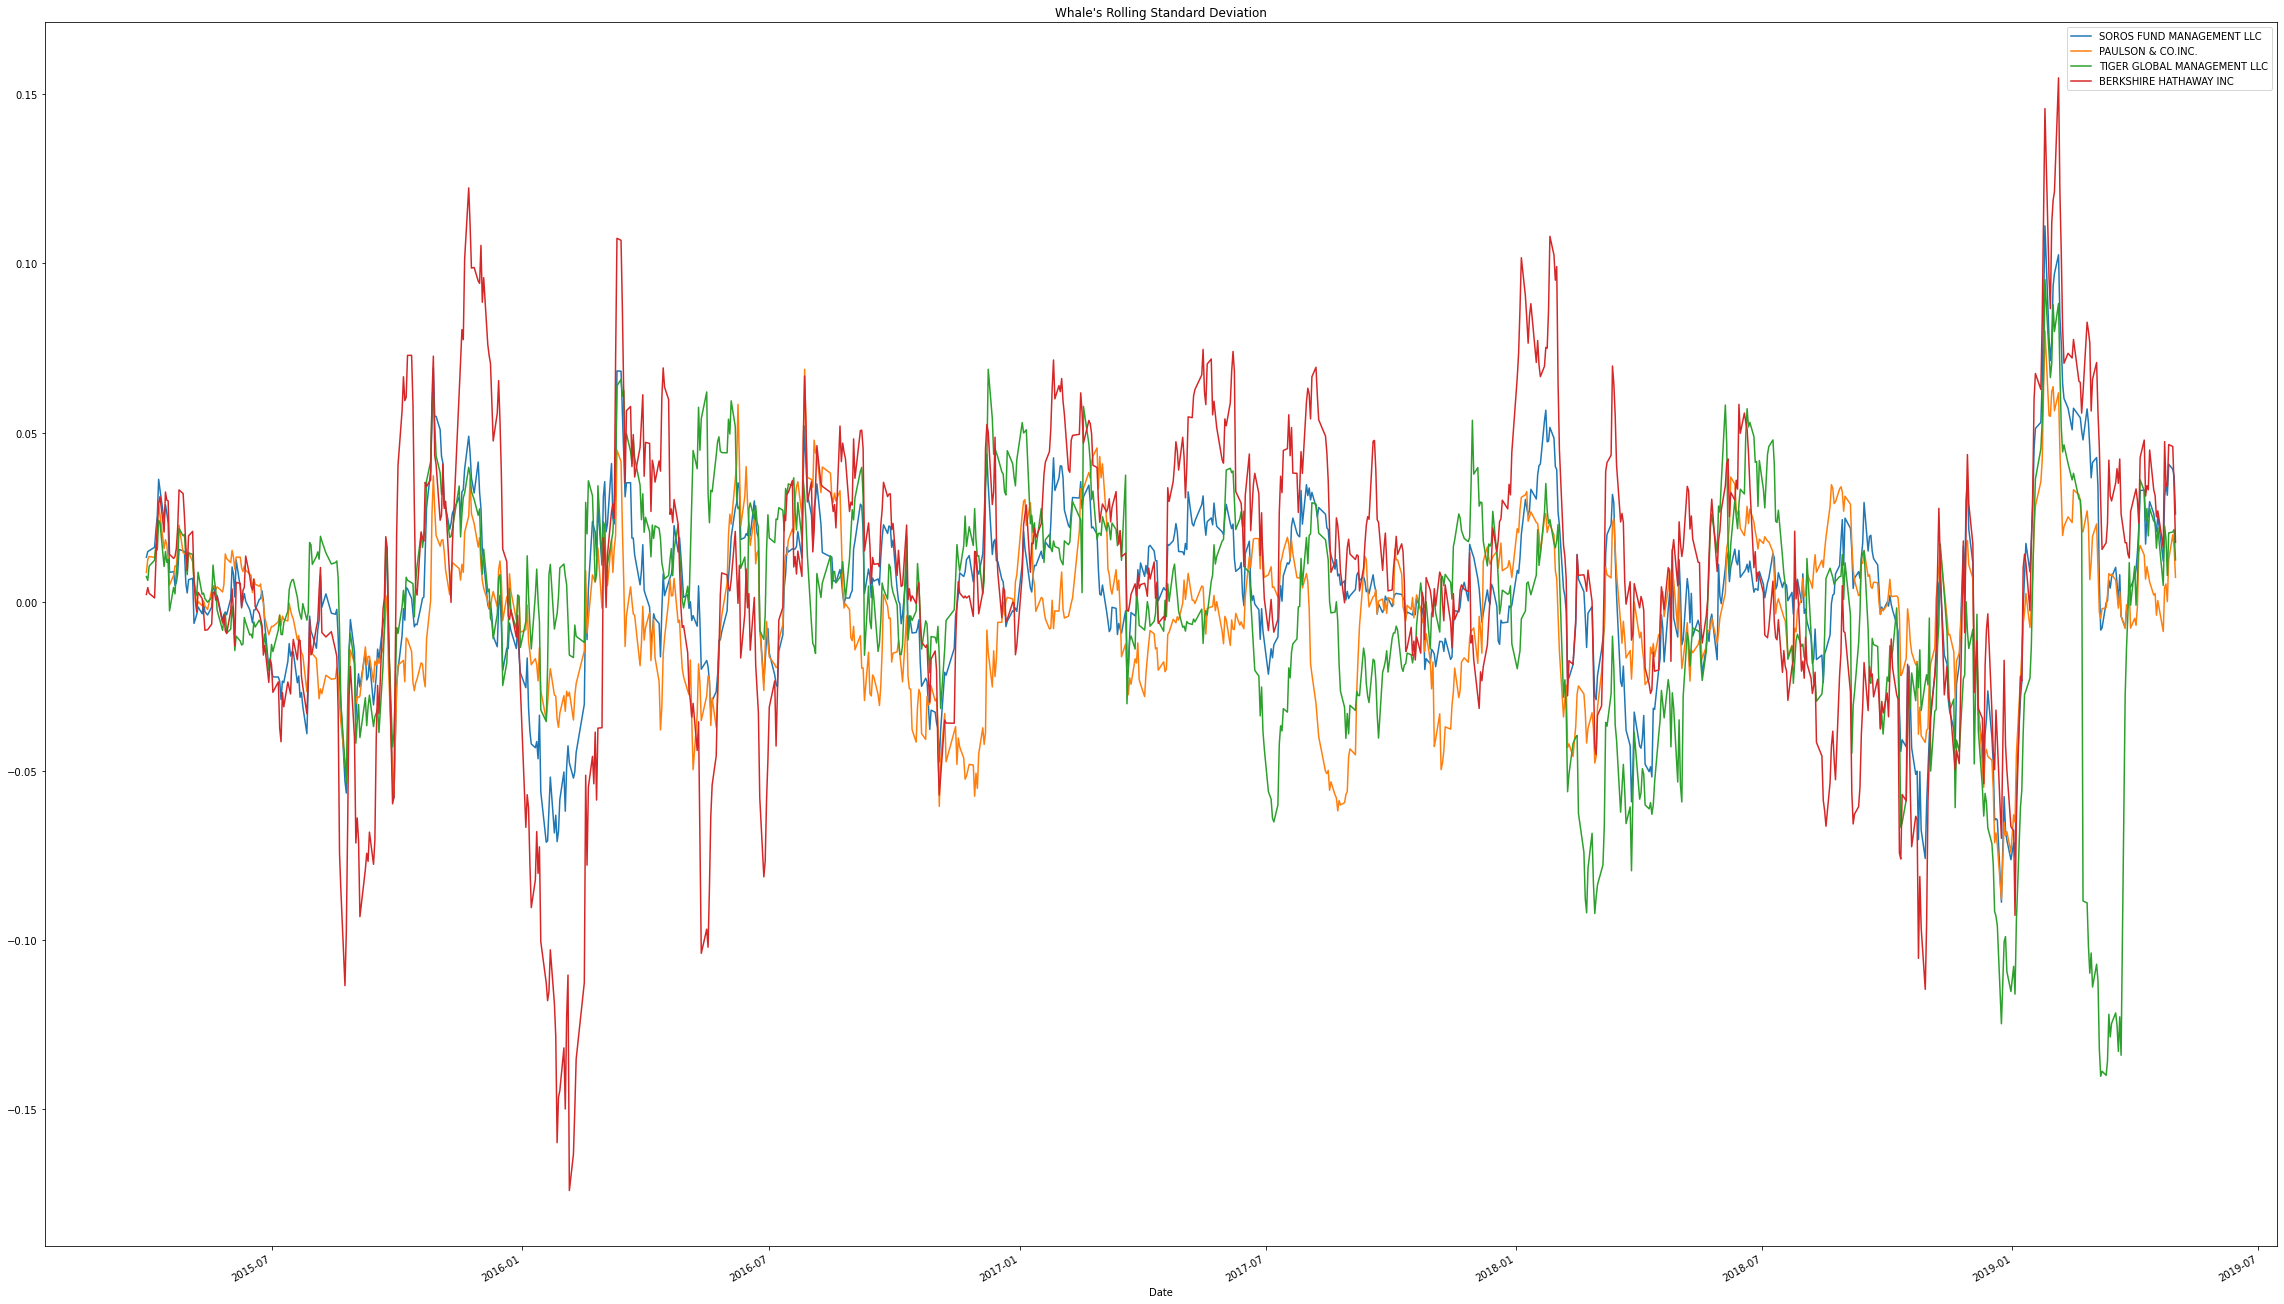

In [93]:
whale_annual_std.rolling(window=21).mean().plot(figsize=(40,25), title="Whale's Rolling Standard Deviation")

##### Algorithmic Rolling Standard Devation

<AxesSubplot:title={'center':'Algorithmic Rolling Standard Deviation'}, xlabel='Date'>

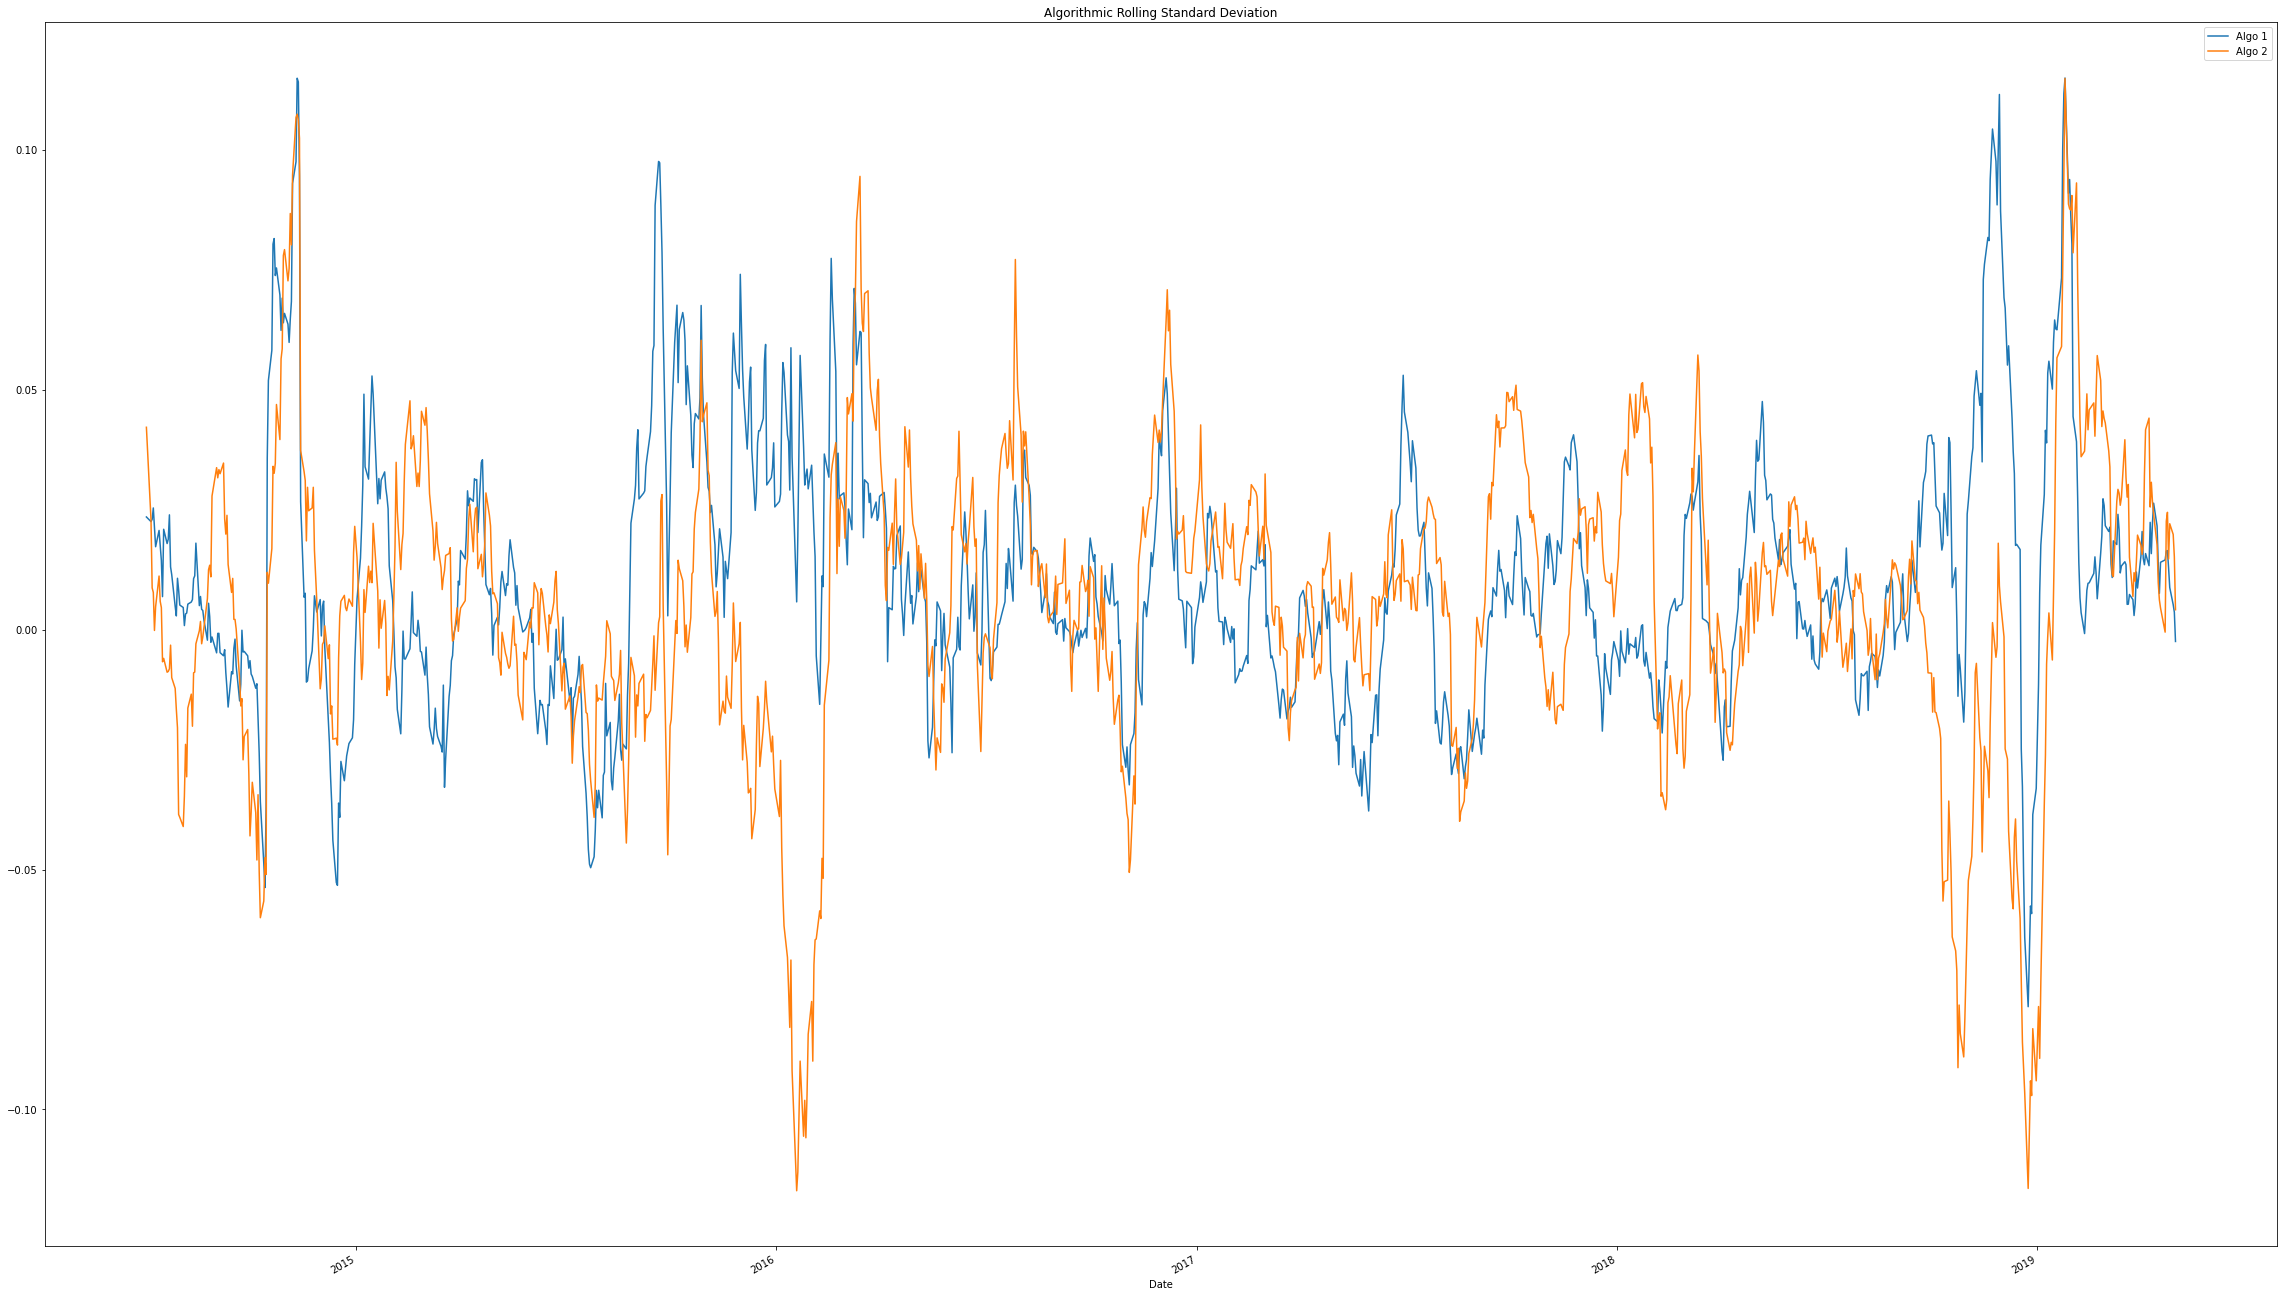

In [94]:
algo_annual_std.rolling(window=21).mean().plot(figsize=(40,25), title="Algorithmic Rolling Standard Deviation")

##### S&P TSX 60 Rolling Standard Deviation

<AxesSubplot:title={'center':'S&P TSX 60 Rolling Standard Deviation'}, xlabel='Date'>

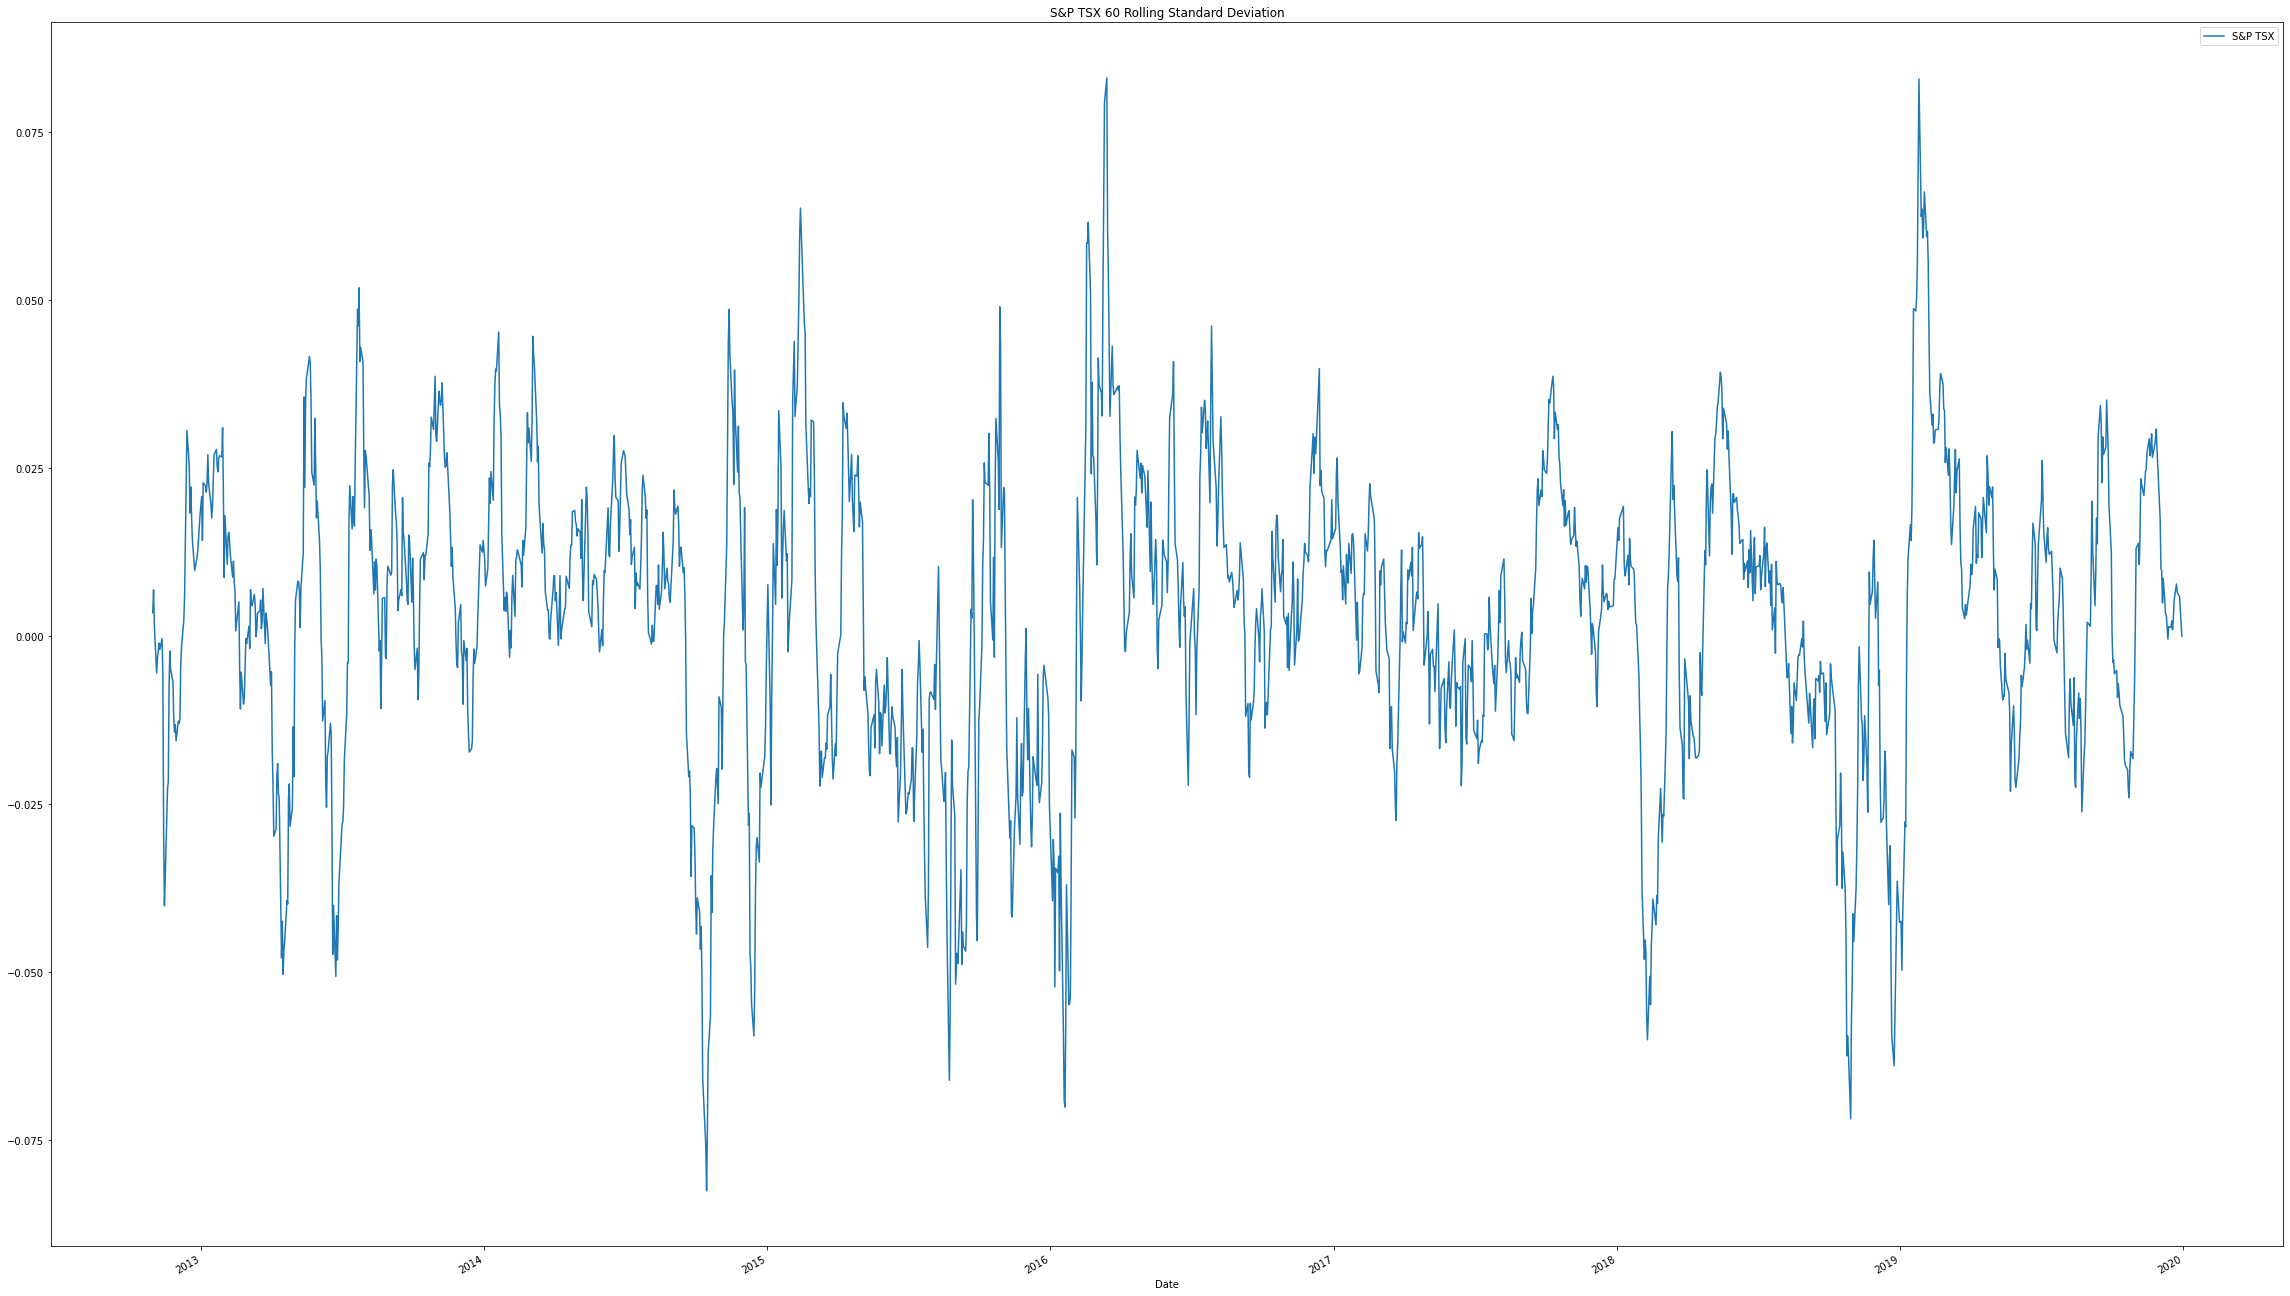

In [95]:
sp_annual_std.rolling(window=21).mean().plot(figsize=(40,25), title="S&P TSX 60 Rolling Standard Deviation")

### Calculate and Plot the Correlation between each stock to determine which Portfolio mimics the S&P TSX 60

In [96]:
import seaborn as sns

#### Whale and S&P TSX 60 Portfolio

In [97]:
whale_sp_df = pd.concat([whale_dr, sp_dr], axis="columns", join="inner")
whale_sp_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P TSX  
Date                                                                       
2015-03-03                    -0.000496               -0.006569 -0.008530  
2015-03-04                    -0.002534                0.004213 -0.003371  
2015-03-05                     0.002355                0.006726  0.001344  
2015-03-06                    -0.008481               -0.013098 -0.009972  
2015-03-09                     0.005843               -0.001652 -0.006555

In [98]:
whale_sp_correlation = whale_sp_df.corr()

<AxesSubplot:>

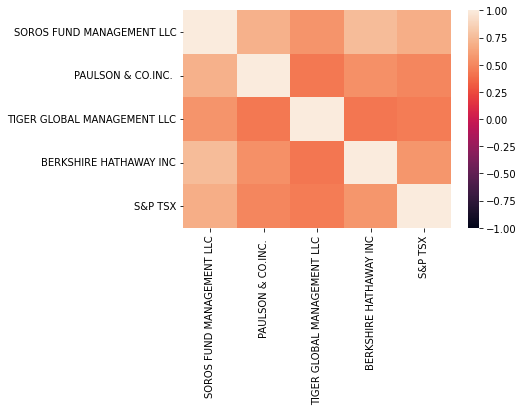

In [99]:
sns.heatmap(whale_sp_correlation, vmin=-1, vmax=1)

#### Algorithmic and S&P TSX 60 Portfolio

In [100]:
algo_sp_df = pd.concat([algo_dr, sp_dr], axis="columns", join="inner")
algo_sp_df.head()

Algo 1    Algo 2   S&P TSX
Date                                    
2014-06-05  0.004062  0.013285  0.000229
2014-06-06  0.001857  0.008284  0.002616
2014-06-09 -0.005012  0.005668  0.002177
2014-06-10  0.004406 -0.000735  0.002230
2014-06-11  0.004760 -0.003761 -0.000822

In [101]:
algo_sp_correlation = algo_sp_df.corr()

<AxesSubplot:>

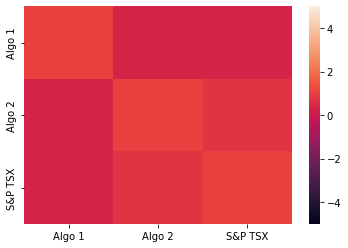

In [102]:
sns.heatmap(algo_sp_correlation, vmin=-5, vmax=5)

### Which Portfolio may mimic the S&P TSX 60

#### The Portfolio that may mimic the S&P TSX 60 isn't the whole of either the Whale nor the Algorithmic Portfolio. However, in regard to the correlation between each stock, both Algo 2 and Tigers and Soros stock seem to mimic the S&P TSX 60.

### Choose Portfolio --> Calculate and Plot the 60-day rolling beta between the Portfolio and the S&P TSX 60
#### Algorithmic 1 Portfolio

In [103]:
covariance = daily_returns['Algo 1'].cov(daily_returns['S&P TSX'])
covariance

1.6520816656430324e-05

In [104]:
variance = daily_returns['S&P TSX'].var()
variance

4.9317024404983076e-05

In [105]:
algo_beta = covariance / variance
algo_beta

0.33499216255960956

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Algo 1 Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

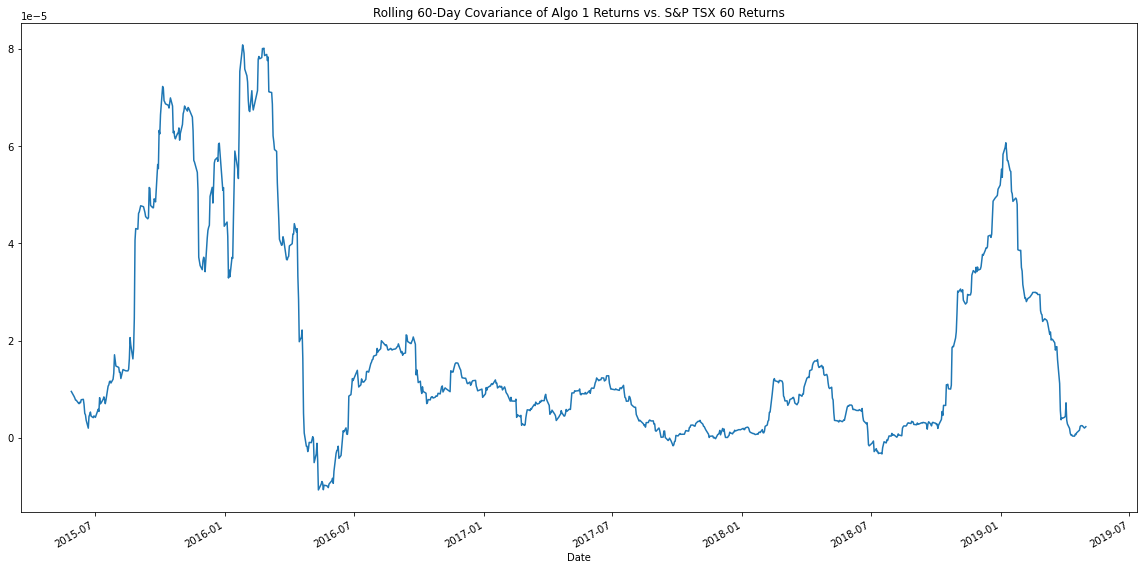

In [106]:
rolling_covariance = daily_returns['Algo 1'].rolling(window=60).cov(daily_returns['S&P TSX'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Algo 1 Returns vs. S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 60-Day Variance of S&P TSX 60 Returns'}, xlabel='Date'>

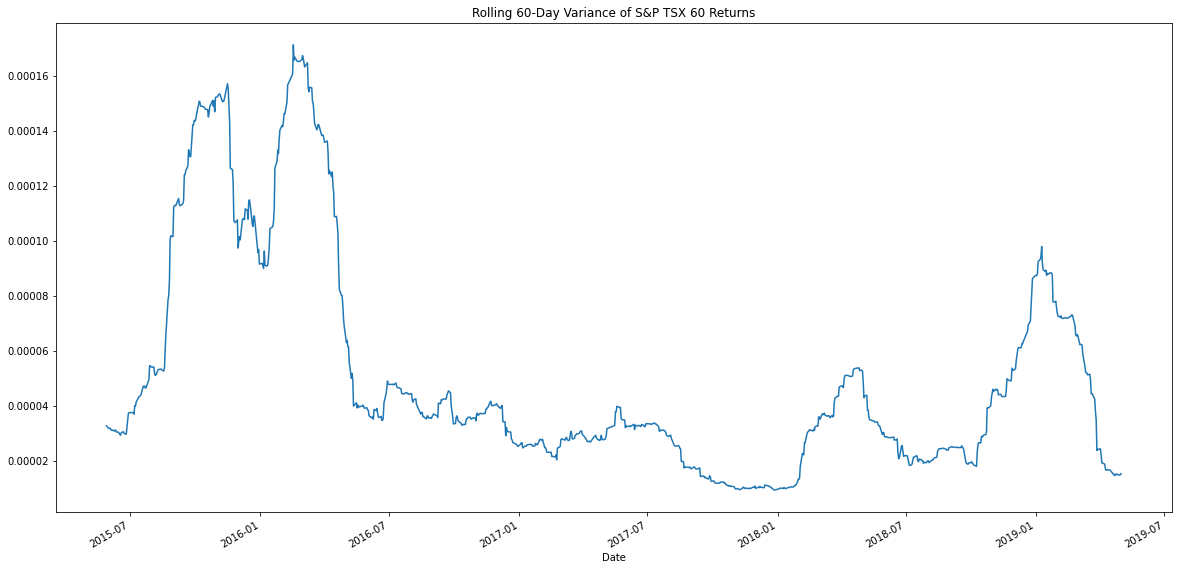

In [107]:
rolling_variance = daily_returns['S&P TSX'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1 Returns'}, xlabel='Date'>

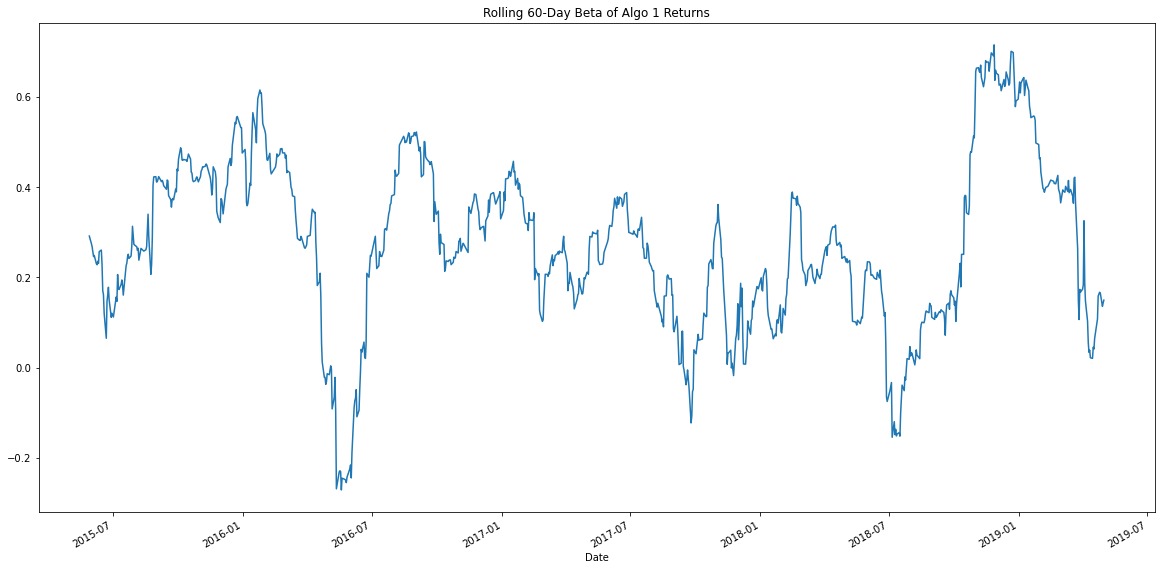

In [108]:
algo1_rolling_beta = rolling_covariance / rolling_variance
algo1_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1 Returns')

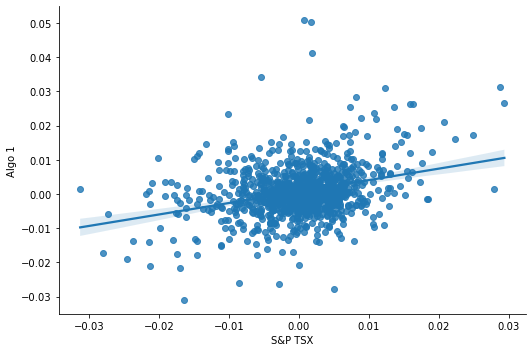

In [109]:
sns.lmplot(x='S&P TSX', y='Algo 1', data=daily_returns, aspect=1.5, fit_reg=True)

## Sharpe Ratios

### Calculate Sharpe Ratios and visualised in a bar plot

In [110]:
sharpe_ratios = (daily_returns.mean() * 252) / (annualised_std * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.032822
PAULSON & CO.INC.             -0.043279
TIGER GLOBAL MANAGEMENT LLC   -0.010843
BERKSHIRE HATHAWAY INC         0.031270
Algo 1                         0.045328
Algo 2                         0.029073
S&P TSX                        0.027619
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for All Portfolios'}>

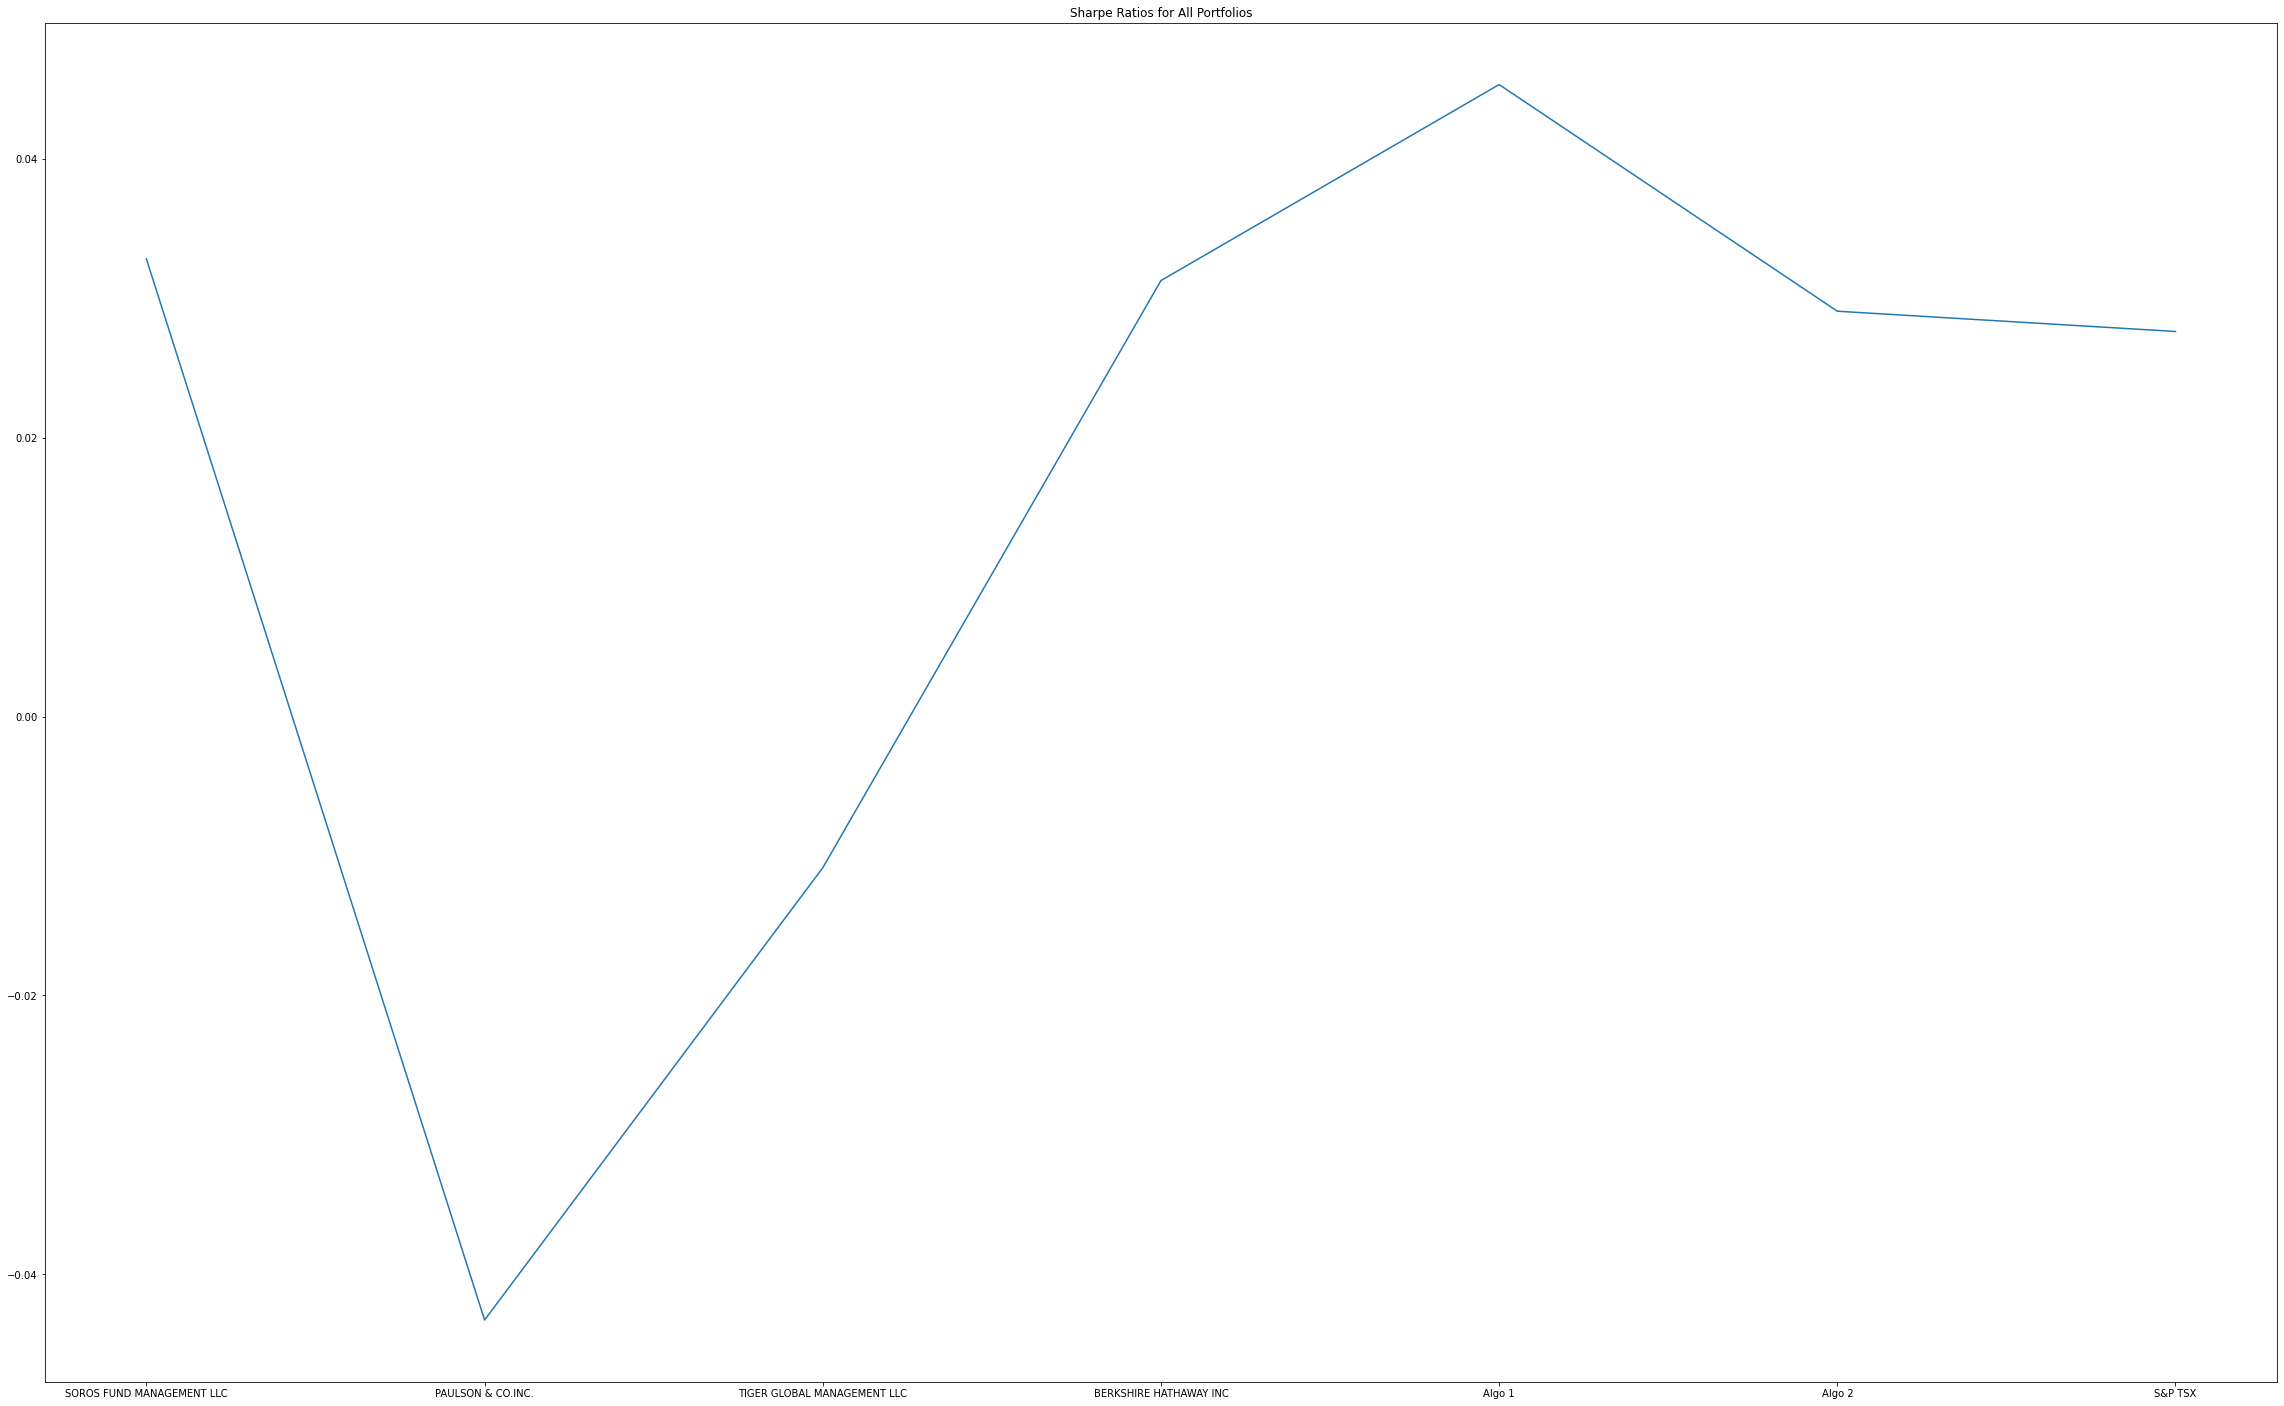

In [111]:
sharpe_ratios.plot(figsize=(40,25), title="Sharpe Ratios for All Portfolios")

### Do algorothmic strategies outperform both the market (S&P TSA 60) and the whales portfolios?

#### With the utilisation of the Sharpe Ratios analysed above. It is evident to suggest that the Algorithmic Strategies did outperformm both the market and the Whale Portfolios, the graph above shows that the Algo Portfolio produces much a higher capital and economical performance. However, it is shown that only Algo 1 outperfromed the portfolios, as Algo 2 (although outperforming the market) did not outperform companies like Berkshire Hathaway Inc. Nonetheless, through the observation of the graph it is suitable to determine that the Algorithmic Strategy is the dominante strategy.

## Create a Custom Portfolio
#### OTEX
#### L
#### SHOP
#### -----------------------------------
##### Download the data as CSV files and calculate the portfolio returns.
##### Calculate the weighted returns for your portfolio

In [112]:
otex_path = Path("/Users/orlando/Desktop/csv/otex_historical.csv")
l_path = Path("/Users/orlando/Desktop/csv/l_historical.csv")
shop_path = Path("/Users/orlando/Desktop/csv/shop_historical.csv")

In [113]:
otex_returns = pd.read_csv(otex_path, index_col='Date', parse_dates=True,infer_datetime_format=True)
l_returns = pd.read_csv(l_path, index_col='Date', parse_dates=True,infer_datetime_format=True)
shop_returns = pd.read_csv(shop_path, index_col='Date', parse_dates=True,infer_datetime_format=True)

In [114]:
otex_returns = otex_returns.drop(columns=["Symbol"])
l_returns = l_returns.drop(columns=["Symbol"])
shop_returns = shop_returns.drop(columns=["Symbol"])

In [115]:
combined_google_returns = pd.concat([otex_returns, l_returns, shop_returns], axis="columns", join="inner")

In [116]:
combined_google_returns.head()

Close  Close   Close
Date                            
2018-01-02  43.58  57.99  132.06
2018-01-03  43.07  57.41  135.15
2018-01-04  42.91  57.42  137.46
2018-01-05  42.57  57.42  137.26
2018-01-08  42.16  56.86  139.51

In [117]:
daily_google_returns = combined_google_returns.pct_change()
daily_google_returns.head()

Close     Close     Close
Date                                    
2018-01-02       NaN       NaN       NaN
2018-01-03 -0.011703 -0.010002  0.023398
2018-01-04 -0.003715  0.000174  0.017092
2018-01-05 -0.007924  0.000000 -0.001455
2018-01-08 -0.009631 -0.009753  0.016392

In [118]:
daily_google_returns.count()

Close    500
Close    500
Close    500
dtype: int64

In [119]:
daily_google_returns.isnull().mean() * 100

Close    0.199601
Close    0.199601
Close    0.199601
dtype: float64

In [120]:
daily_google_returns.dropna();

In [121]:
daily_google_returns.dropna(inplace=True)

In [122]:
daily_google_returns.isnull().sum()

Close    0
Close    0
Close    0
dtype: int64

In [123]:
daily_google_returns.drop_duplicates(inplace=True)

In [124]:
daily_google_returns.sort_index(inplace=True)

In [125]:
weights = [1/3, 1/3, 1/3]
daily_google_returns.columns = ['Otex', 'L', 'Shop']
daily_google_returns.head()

Otex         L      Shop
Date                                    
2018-01-03 -0.011703 -0.010002  0.023398
2018-01-04 -0.003715  0.000174  0.017092
2018-01-05 -0.007924  0.000000 -0.001455
2018-01-08 -0.009631 -0.009753  0.016392
2018-01-09 -0.000712  0.008969 -0.011254

## Add Portfolio Returns to DataFrame.
#### Analyse and Compare all Portfolios

In [126]:
all_portfolio_returns = pd.concat([combined_df,daily_google_returns], axis="columns", join="inner")
all_portfolio_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-01-03                   0.004658            0.000027   
2018-01-04                  -0.000914            0.004196   
2018-01-05                   0.004072            0.000823   
2018-01-08                   0.004473           -0.003739   
2018-01-09                  -0.001028            0.000872   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-03                     0.001979                0.005676 -0.000890   
2018-01-04                     0.010743                0.004065 -0.000914   
2018-01-05                     0.000737                0.022023 -0.003839   
2018-01-08                     0.005085                0.003435  0.001653   
2018-01-09                     0.001789                0.000708 -0.001004   

              Algo 2   S&P TSX      Otex         L      Shop  
Date                                                          
2018-01-03  0.008175  0.003774 -0.011703 -0.010002  0.023398  
2018-01-04  0.004294  0.002528 -0.003715  0.000174  0.017092  
2018-01-05  0.006405 -0.003869 -0.007924  0.000000 -0.001455  
2018-01-08  0.000658 -0.001944 -0.009631 -0.009753  0.016392  
2018-01-09 -0.002091  0.000097 -0.000712  0.008969 -0.011254

#### Annualised Standard Deviation
#### Rolling Standard Deviation with a 21-day window

In [127]:
whole_annualised_std = all_portfolio_returns*np.sqrt(252)
whole_annualised_std.columns=["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P TSX", "Otex", "L", "Shop"]

In [128]:
whole_annualised_std.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
Date                                                       
2018-01-03                   0.073936           0.000430   
2018-01-04                  -0.014515           0.066617   
2018-01-05                   0.064634           0.013069   
2018-01-08                   0.071000          -0.059350   
2018-01-09                  -0.016311           0.013847   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-03                     0.031413                0.090108 -0.014132   
2018-01-04                     0.170537                0.064527 -0.014511   
2018-01-05                     0.011695                0.349600 -0.060946   
2018-01-08                     0.080723                0.054528  0.026247   
2018-01-09                     0.028401                0.011244 -0.015939   

              Algo 2   S&P TSX      Otex         L      Shop  
Date                                                          
2018-01-03  0.129775  0.059916 -0.185773 -0.158772  0.371439  
2018-01-04  0.068170  0.040133 -0.058972  0.002765  0.271329  
2018-01-05  0.101676 -0.061417 -0.125783  0.000000 -0.023097  
2018-01-08  0.010442 -0.030867 -0.152890 -0.154819  0.260219  
2018-01-09 -0.033187  0.001547 -0.011296  0.142385 -0.178647

<AxesSubplot:title={'center':'Whole Portfolio Rolling Standard Deviation'}, xlabel='Date'>

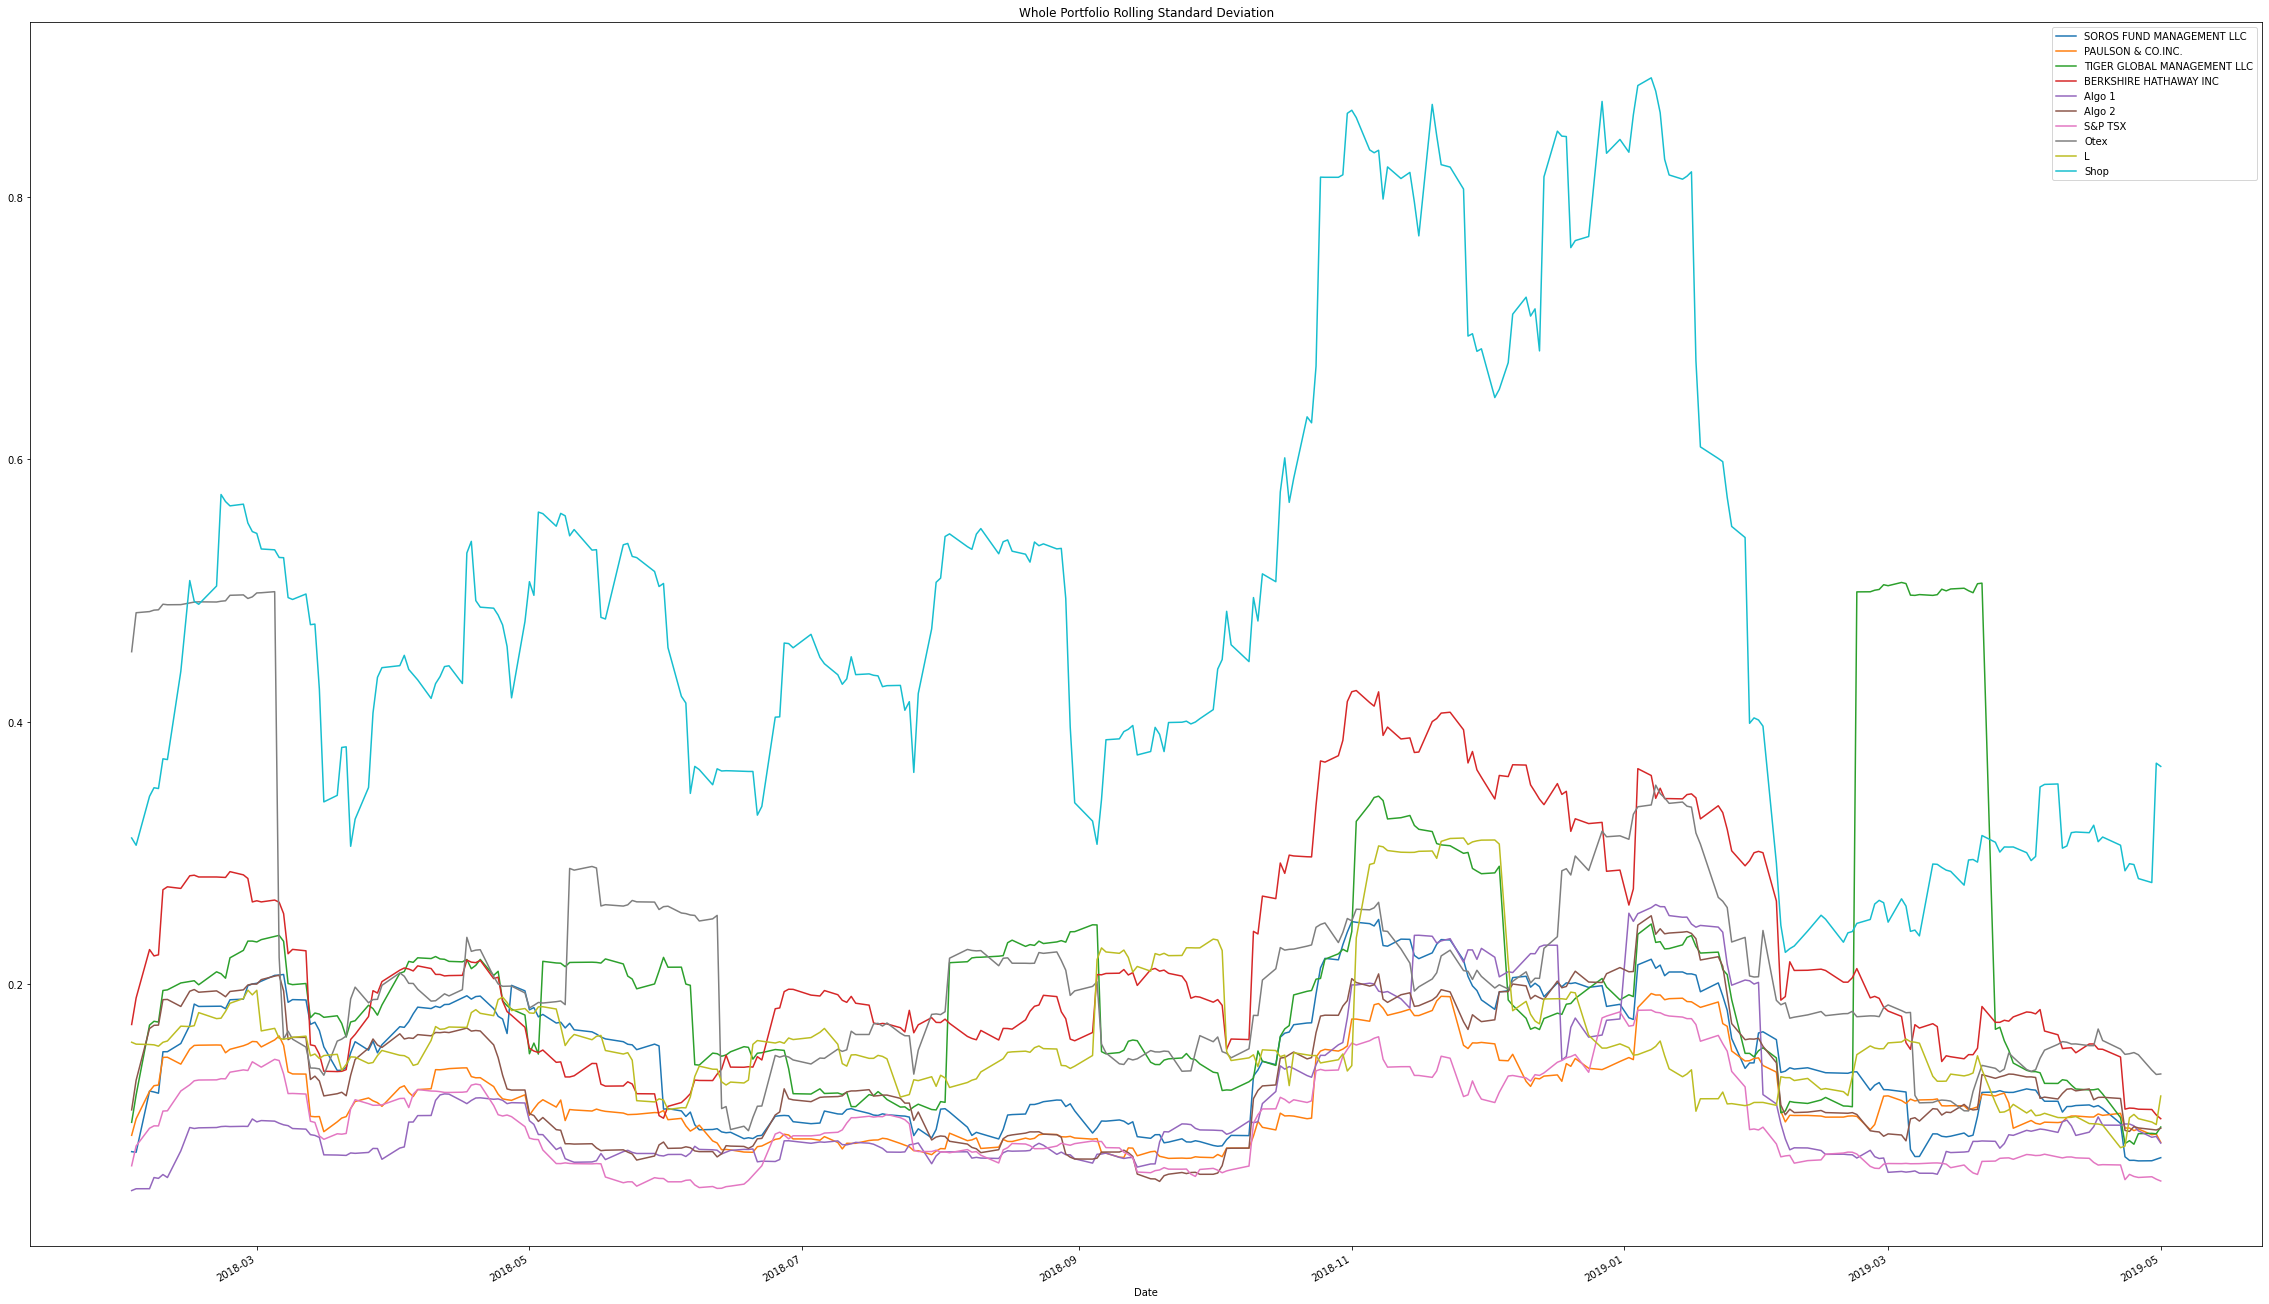

In [129]:
whole_annualised_std.rolling(window=21).std().plot(figsize=(40,25), title="Whole Portfolio Rolling Standard Deviation")

#### Calculate and Plot Correlation

In [130]:
price_correlation_of_all_portfolios = all_portfolio_returns.corr()

In [131]:
price_correlation_of_all_portfolios.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.764176   
PAULSON & CO.INC.                             0.764176            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.526739            0.536534   
BERKSHIRE HATHAWAY INC                        0.782417            0.647417   
Algo 1                                        0.306522            0.321756   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.526739   
PAULSON & CO.INC.                               0.536534   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.384364   
Algo 1                                          0.131914   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.782417  0.306522  0.837952   
PAULSON & CO.INC.                          0.647417  0.321756  0.800784   
TIGER GLOBAL MANAGEMENT LLC                0.384364  0.131914  0.486999   
BERKSHIRE HATHAWAY INC                     1.000000  0.295526  0.786631   
Algo 1                                     0.295526  1.000000  0.322722   

                              S&P TSX      Otex         L      Shop  
SOROS FUND MANAGEMENT LLC    0.689138  0.384836  0.192807  0.511412  
PAULSON & CO.INC.            0.625942  0.321292  0.164854  0.319810  
TIGER GLOBAL MANAGEMENT LLC  0.440294  0.251221  0.341216  0.185406  
BERKSHIRE HATHAWAY INC       0.652161  0.414235  0.131339  0.640609  
Algo 1                       0.283740  0.113043  0.097037  0.206366

<AxesSubplot:>

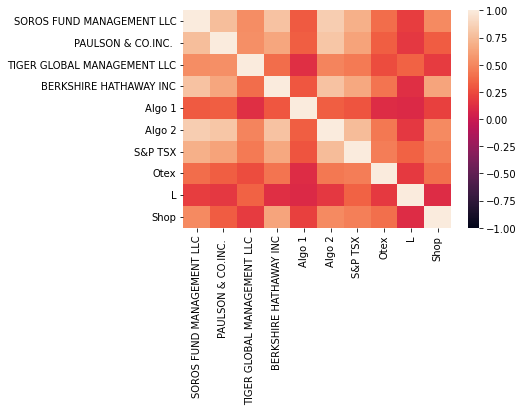

In [132]:
sns.heatmap(price_correlation_of_all_portfolios, vmin=-1, vmax=1)

## Calculate and Plot Beta foe Portfolio and compare to the S&P TSX 60

#### SOROS v S&P TSX 60

In [133]:
# Calculate covariance of all daily returns of SORS vs. S&P TSX
svs_covariance = all_portfolio_returns['SOROS FUND MANAGEMENT LLC'].cov(all_portfolio_returns['S&P TSX'])
svs_covariance

4.008132969972682e-05

In [134]:
# Calculate variance of the S&P TSX
svs_variance = all_portfolio_returns['S&P TSX'].var()
svs_variance

3.943325271289693e-05

In [135]:
# Calculate beta of all portfolio returns of SOROS
soros_beta = svs_covariance / svs_variance
soros_beta

1.0164347839004906

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of SOROS Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

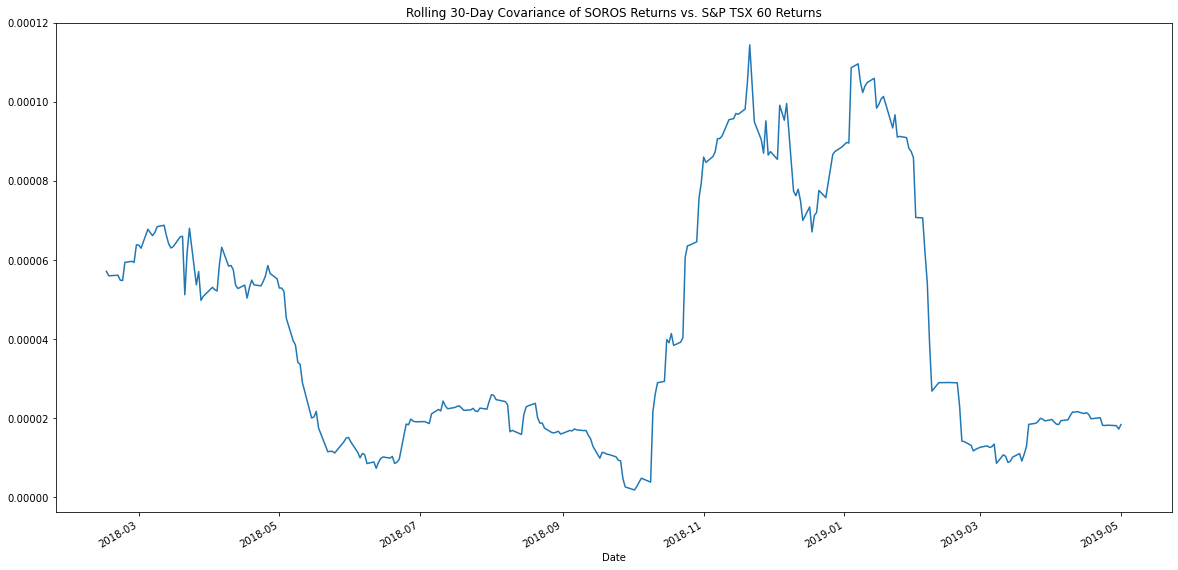

In [136]:
# Calculate 30-day rolling covariance of SOROS vs. S&P TSX and plot the data
svs_rolling_covariance = all_portfolio_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(all_portfolio_returns['S&P TSX'])
svs_rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of SOROS Returns vs. S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P TSX 60 Returns'}, xlabel='Date'>

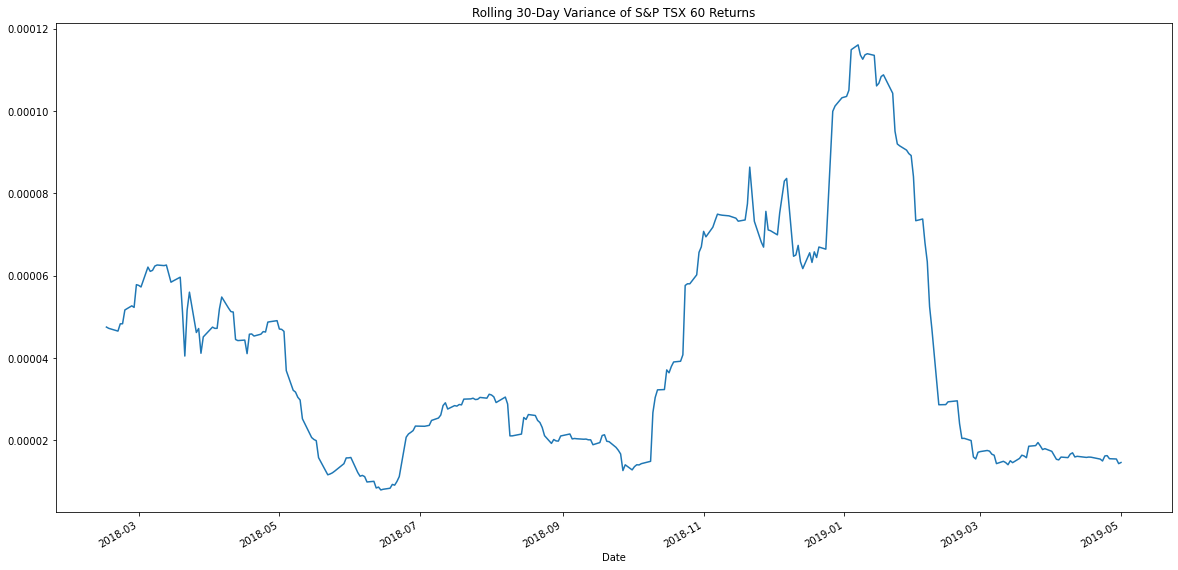

In [137]:
# Calculate 30-day rolling variance of SOROS vs. S&P TSX and plot the data
svs_rolling_variance = all_portfolio_returns['S&P TSX'].rolling(window=30).var()
svs_rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of SOROS'}, xlabel='Date'>

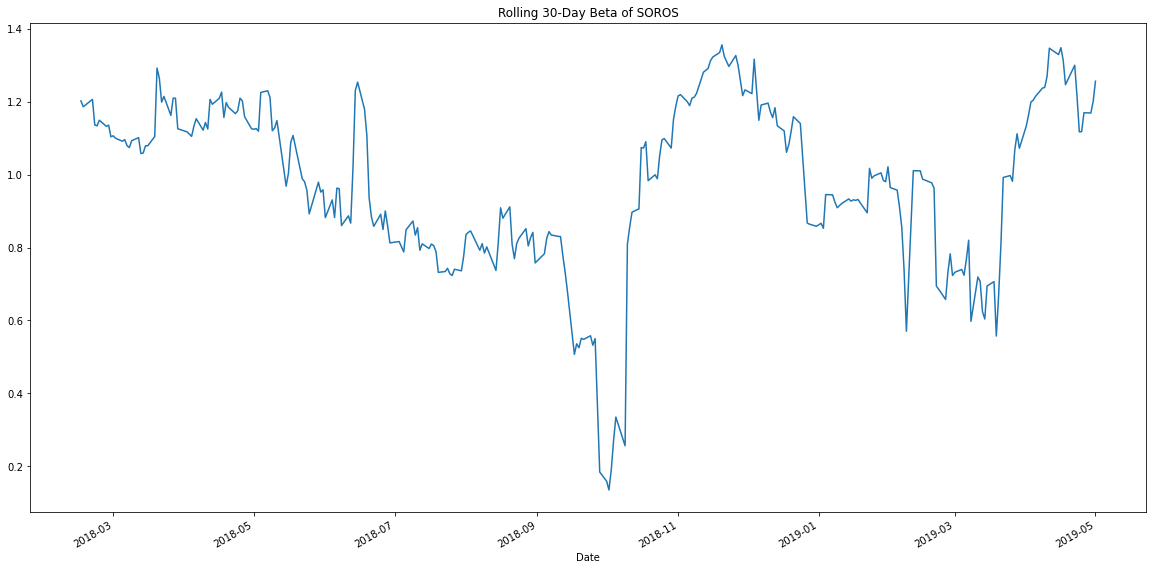

In [138]:
# Calculate 30-day rolling beta of SOROS and plot the data
svs_rolling_beta = svs_rolling_covariance / svs_rolling_variance
svs_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of SOROS')

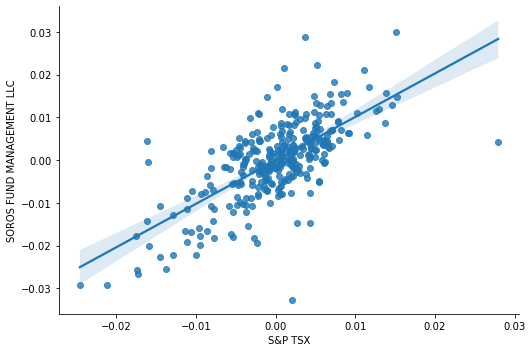

In [139]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='S&P TSX', y='SOROS FUND MANAGEMENT LLC', data=all_portfolio_returns, aspect=1.5, fit_reg=True)

#### TIGER GLOBAL MANAGEMENT LLC v S&P TSX 60

In [140]:
tvs_covariance = all_portfolio_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(all_portfolio_returns['S&P TSX'])
tvs_covariance

3.864170874722931e-05

In [159]:
tvs_variance = all_portfolio_returns['S&P TSX'].var()
tvs_variance

3.943325271289693e-05

In [160]:
tiger_beta = tvs_covariance / tvs_variance
tiger_beta

0.9799269927989295

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Tiger Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

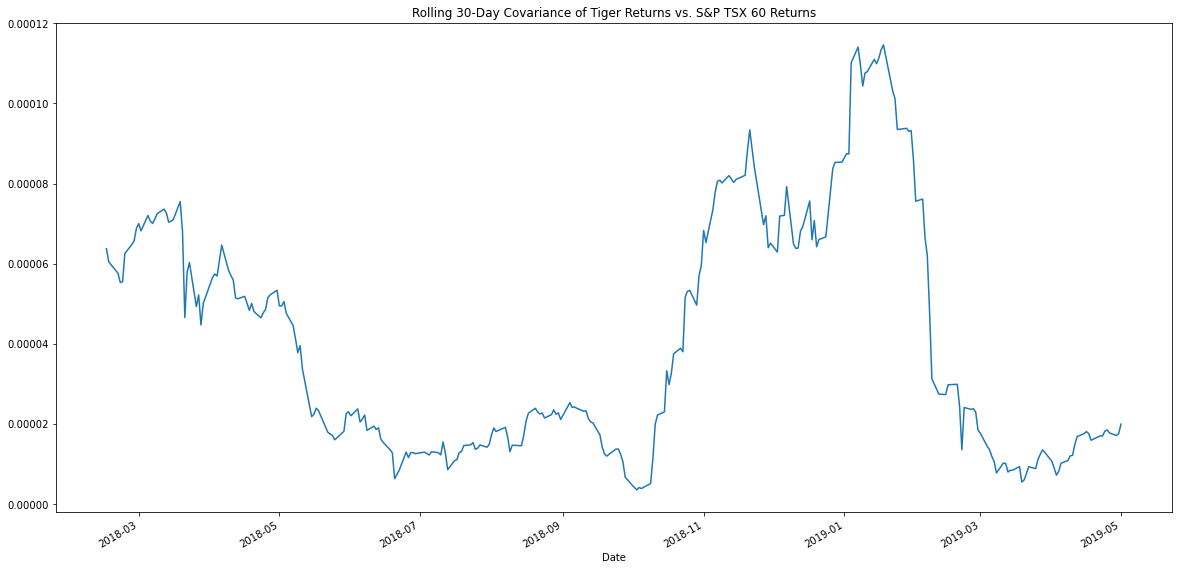

In [161]:
tvs_rolling_covariance = all_portfolio_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(all_portfolio_returns['S&P TSX'])
tvs_rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Tiger Returns vs. S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P TSX 60 Returns'}, xlabel='Date'>

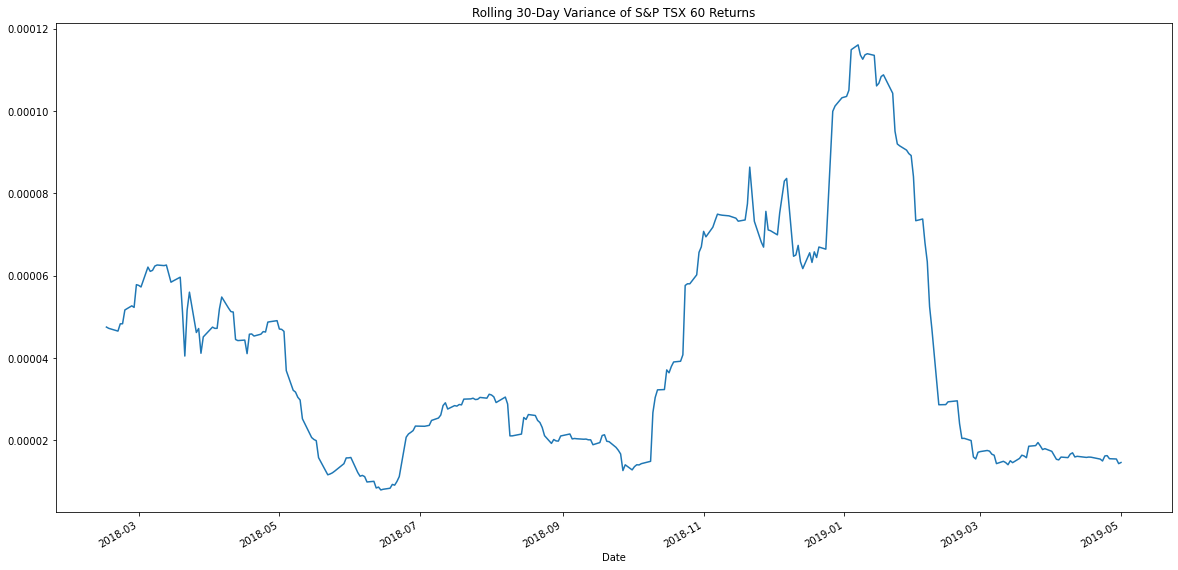

In [163]:
tvs_rolling_variance = all_portfolio_returns['S&P TSX'].rolling(window=30).var()
tvs_rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Tiger'}, xlabel='Date'>

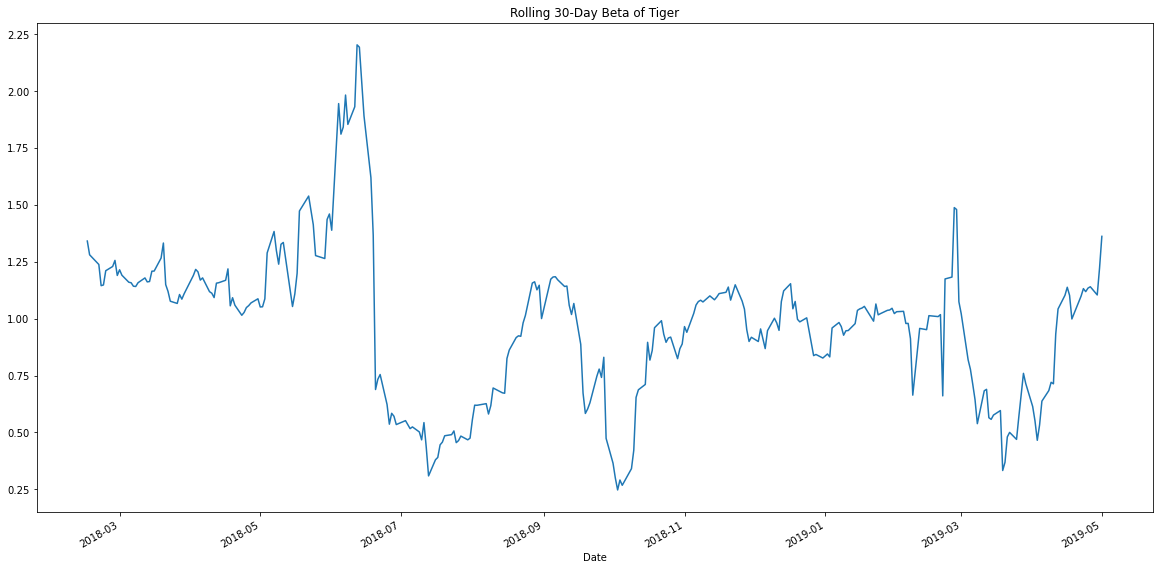

In [164]:
tvs_rolling_beta = tvs_rolling_covariance / tvs_rolling_variance
tvs_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Tiger')

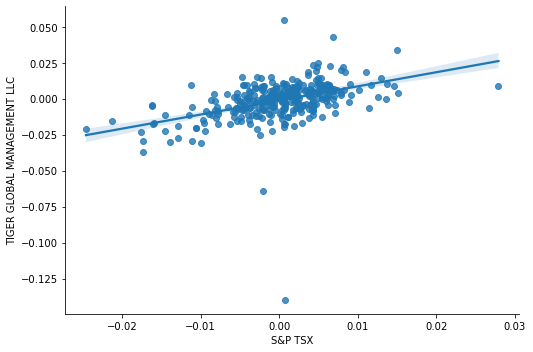

In [165]:
sns.lmplot(x='S&P TSX', y='TIGER GLOBAL MANAGEMENT LLC', data=all_portfolio_returns, aspect=1.5, fit_reg=True)

#### BERKSHIRE HATHAWAY INC v S&P TSX 60

In [168]:
bvs_covariance = all_portfolio_returns['BERKSHIRE HATHAWAY INC'].cov(all_portfolio_returns['S&P TSX'])
bvs_covariance

5.9222046109532394e-05

In [169]:
bvs_variance = all_portfolio_returns['S&P TSX'].var()
bvs_variance

3.943325271289693e-05

In [170]:
berkshire_beta = bvs_covariance / bvs_variance
berkshire_beta

1.5018301061977422

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Berkshire Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

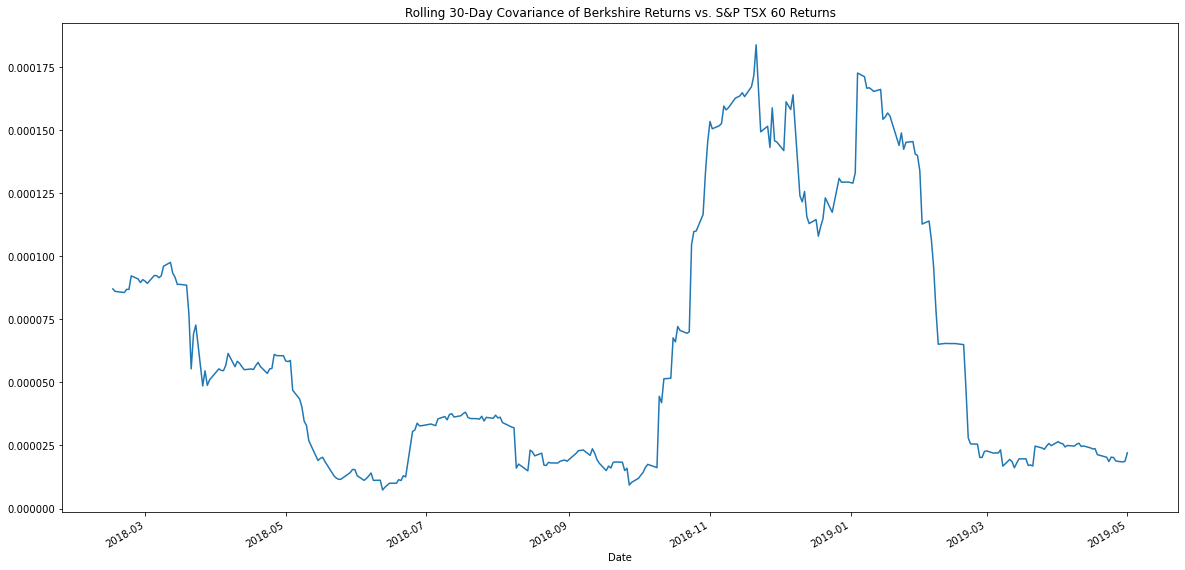

In [171]:
bvs_rolling_covariance = all_portfolio_returns['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(all_portfolio_returns['S&P TSX'])
bvs_rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Berkshire Returns vs. S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P TSX 60 Returns'}, xlabel='Date'>

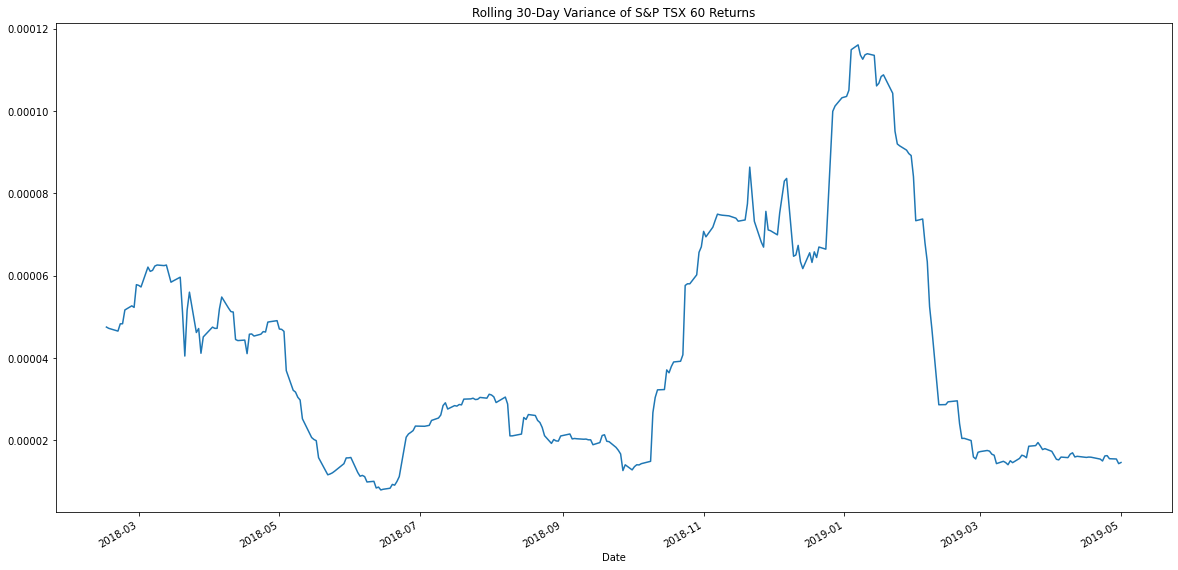

In [172]:
bvs_rolling_variance = all_portfolio_returns['S&P TSX'].rolling(window=30).var()
bvs_rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Berkshire'}, xlabel='Date'>

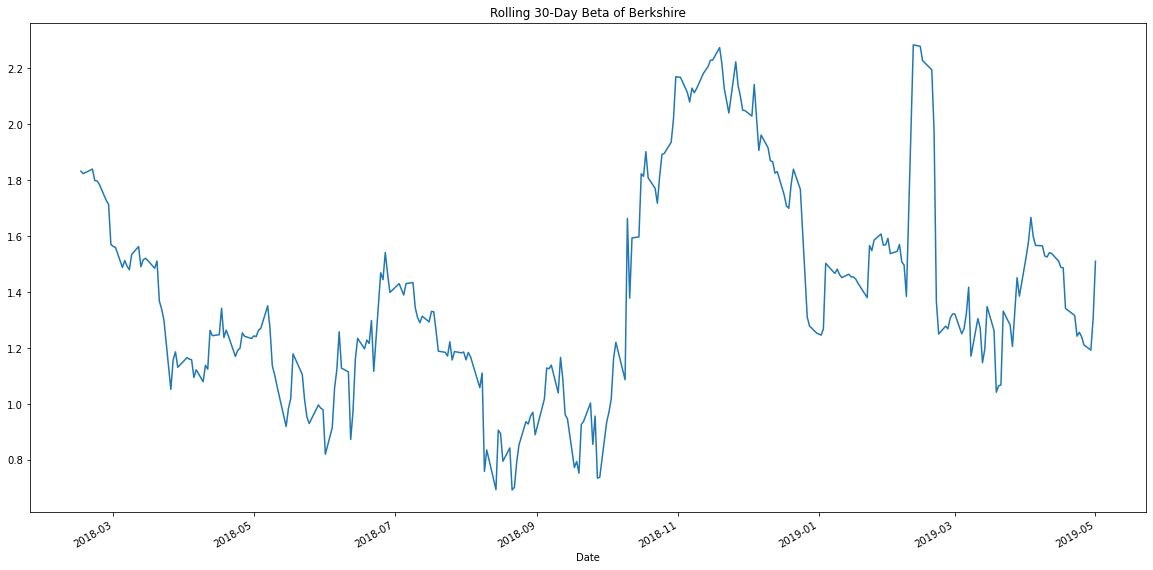

In [173]:
bvs_rolling_beta = bvs_rolling_covariance / bvs_rolling_variance
bvs_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Berkshire')

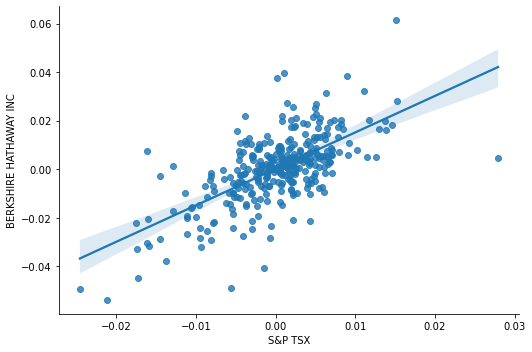

In [174]:
sns.lmplot(x='S&P TSX', y='BERKSHIRE HATHAWAY INC', data=all_portfolio_returns, aspect=1.5, fit_reg=True)

#### Algo 1 v S&P TSX 60

In [143]:
a1vs_covariance = all_portfolio_returns['Algo 1'].cov(all_portfolio_returns['S&P TSX'])
a1vs_covariance

1.355499861981168e-05

In [175]:
a1vs_variance = all_portfolio_returns['S&P TSX'].var()
a1vs_variance

3.943325271289693e-05

In [176]:
algo1_beta = a1vs_covariance / a1vs_variance
algo1_beta

0.34374538459969395

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Algo 1 Returns vs S&P TSX 60 Returns'}, xlabel='Date'>

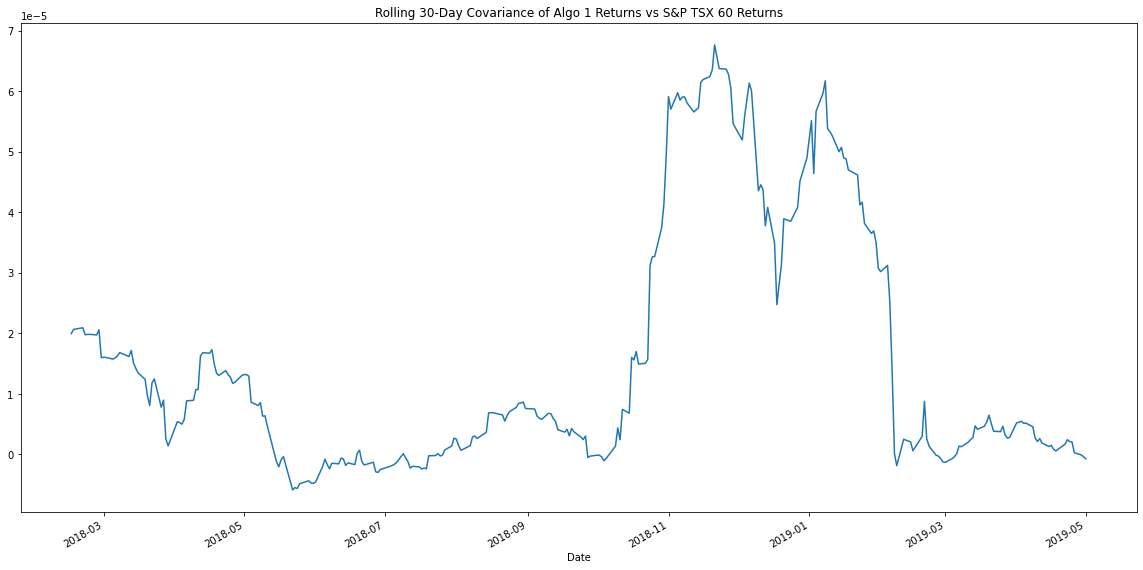

In [177]:
a1vs_rolling_covariance = all_portfolio_returns['Algo 1'].rolling(window=30).cov(all_portfolio_returns['S&P TSX'])
a1vs_rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Algo 1 Returns vs S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P TSX 60 Returns'}, xlabel='Date'>

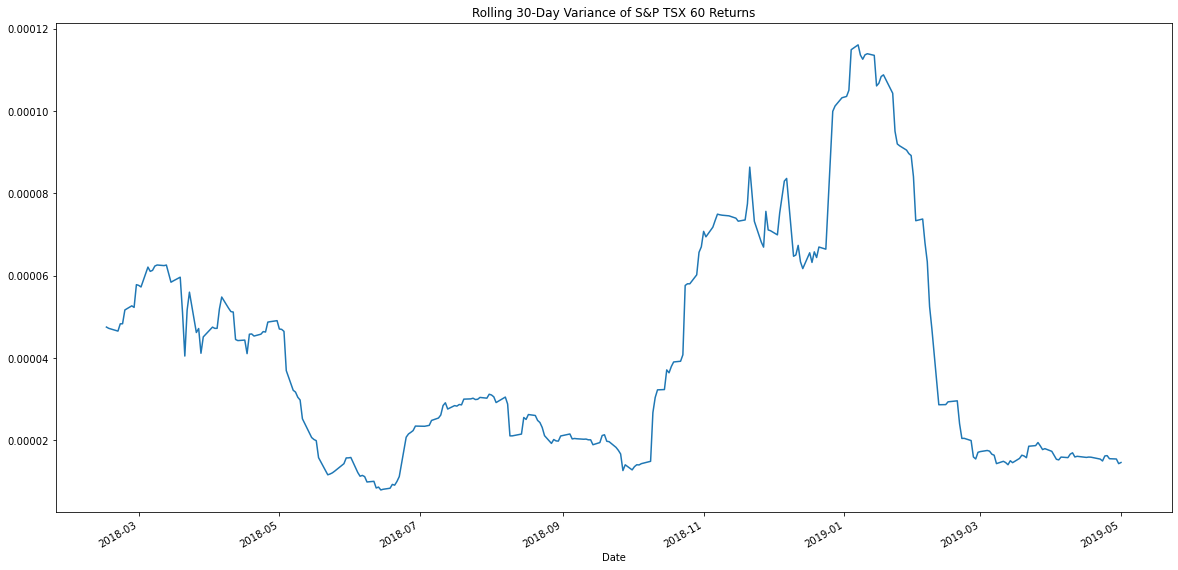

In [178]:
a1vs_rolling_variance = all_portfolio_returns['S&P TSX'].rolling(window=30).var()
a1vs_rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo 1'}, xlabel='Date'>

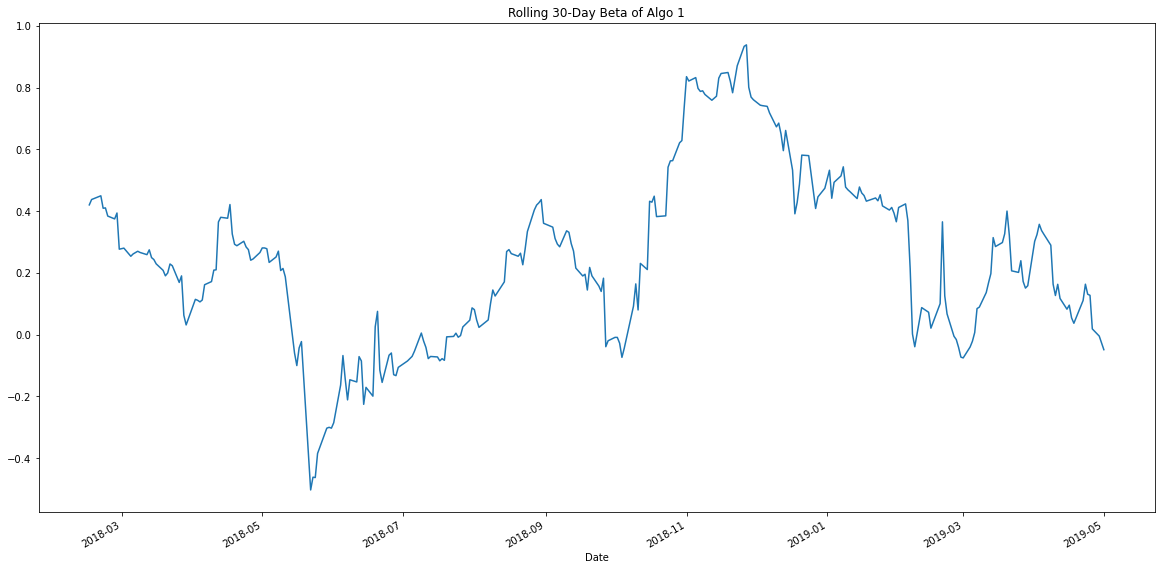

In [179]:
a1vs_rolling_beta = a1vs_rolling_covariance / a1vs_rolling_variance
a1vs_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')

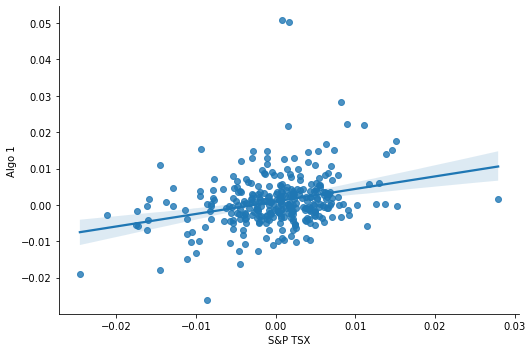

In [180]:
sns.lmplot(x='S&P TSX', y='Algo 1', data=all_portfolio_returns, aspect=1.5, fit_reg=True)

#### Algo 2 v S&P TSX 60

In [184]:
a2vs_covariance = all_portfolio_returns['Algo 2'].cov(all_portfolio_returns['S&P TSX'])
a2vs_covariance

4.1338758536984265e-05

In [185]:
a2vs_variance = all_portfolio_returns['S&P TSX'].var()
a2vs_variance

3.943325271289693e-05

In [186]:
algo2_beta = a2vs_covariance / a2vs_variance
algo2_beta

1.0483223090410732

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Algo 2 Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

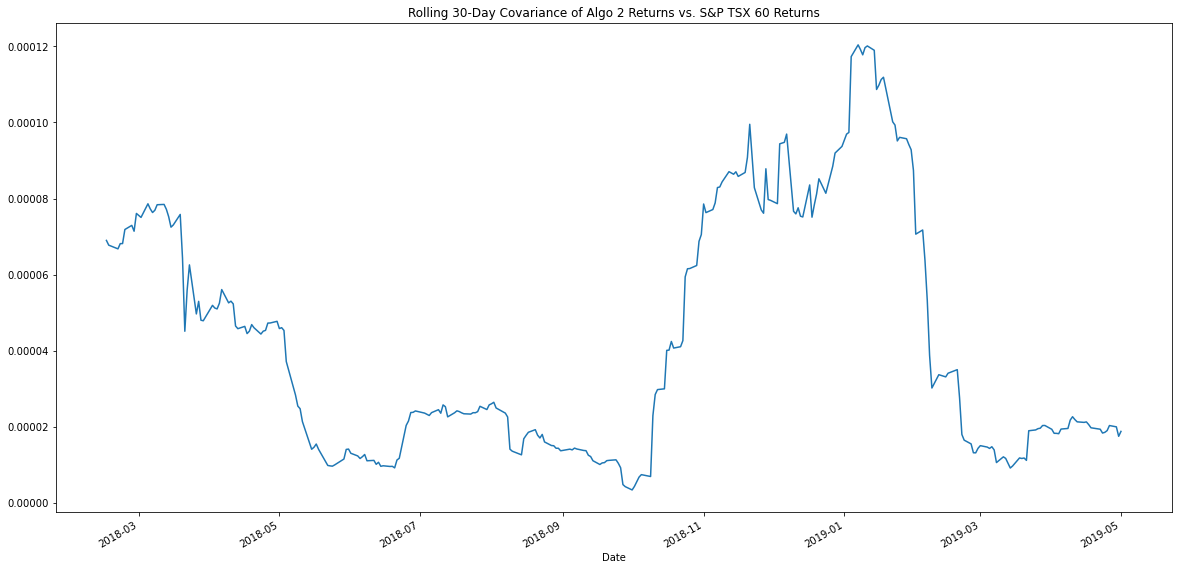

In [187]:
a2vs_rolling_covariance = all_portfolio_returns['Algo 2'].rolling(window=30).cov(all_portfolio_returns['S&P TSX'])
a2vs_rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Algo 2 Returns vs. S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P TSX 60 Returns'}, xlabel='Date'>

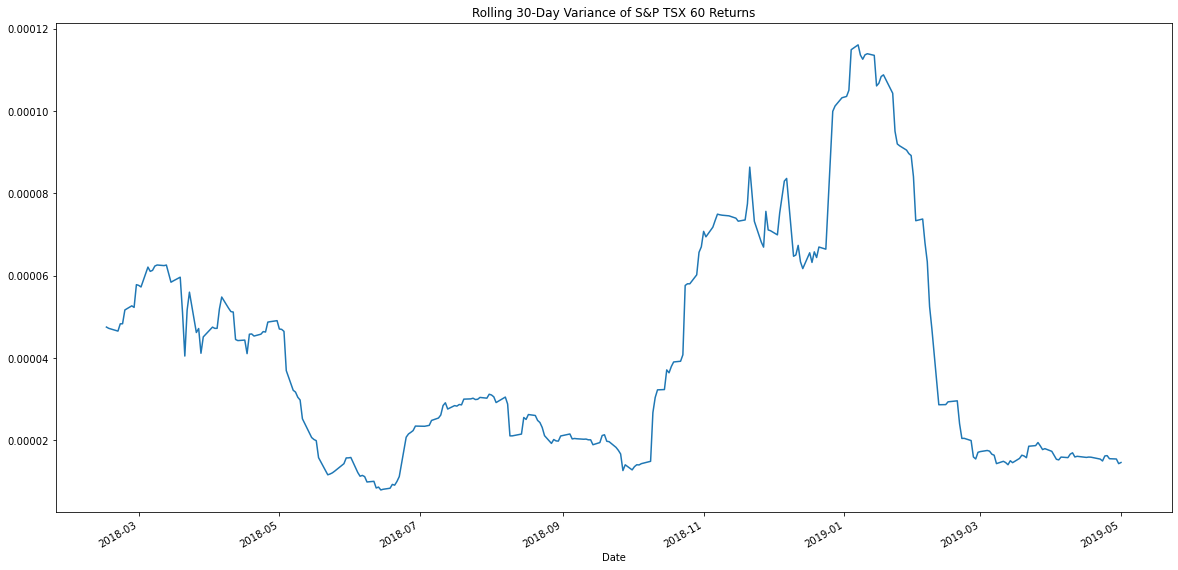

In [188]:
a2vs_rolling_variance = all_portfolio_returns['S&P TSX'].rolling(window=30).var()
a2vs_rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Algo 2'}, xlabel='Date'>

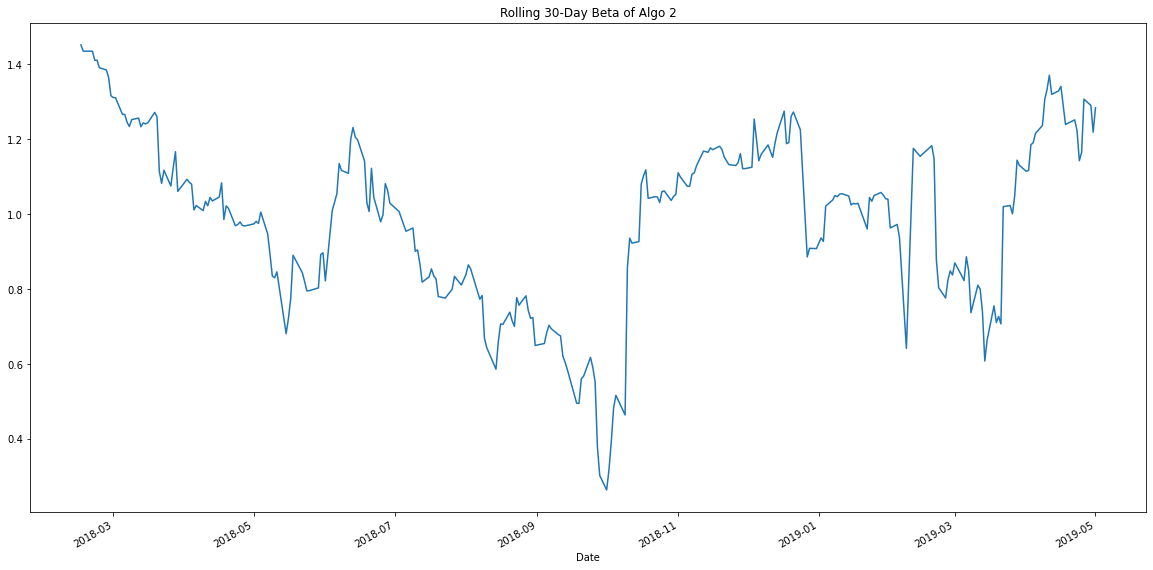

In [190]:
a2vs_rolling_beta = a2vs_rolling_covariance / a2vs_rolling_variance
a2vs_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 2')

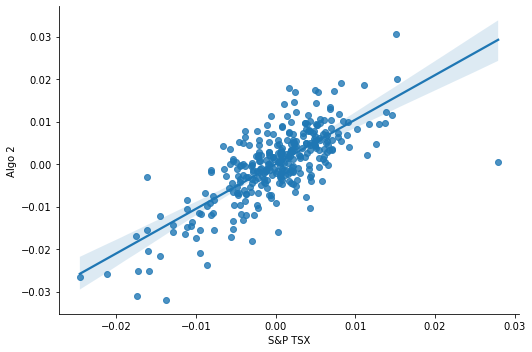

In [191]:
sns.lmplot(x='S&P TSX', y='Algo 2', data=all_portfolio_returns, aspect=1.5, fit_reg=True)

#### Otex v S&P TSX 60

In [150]:
ovs_covariance = all_portfolio_returns['Otex'].cov(all_portfolio_returns['S&P TSX'])
ovs_covariance

4.095463505498924e-05

In [192]:
ovs_variance = all_portfolio_returns['S&P TSX'].var()
ovs_variance

3.943325271289693e-05

In [193]:
otex_beta = ovs_covariance / ovs_variance
otex_beta

1.0385812033607549

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Otex Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

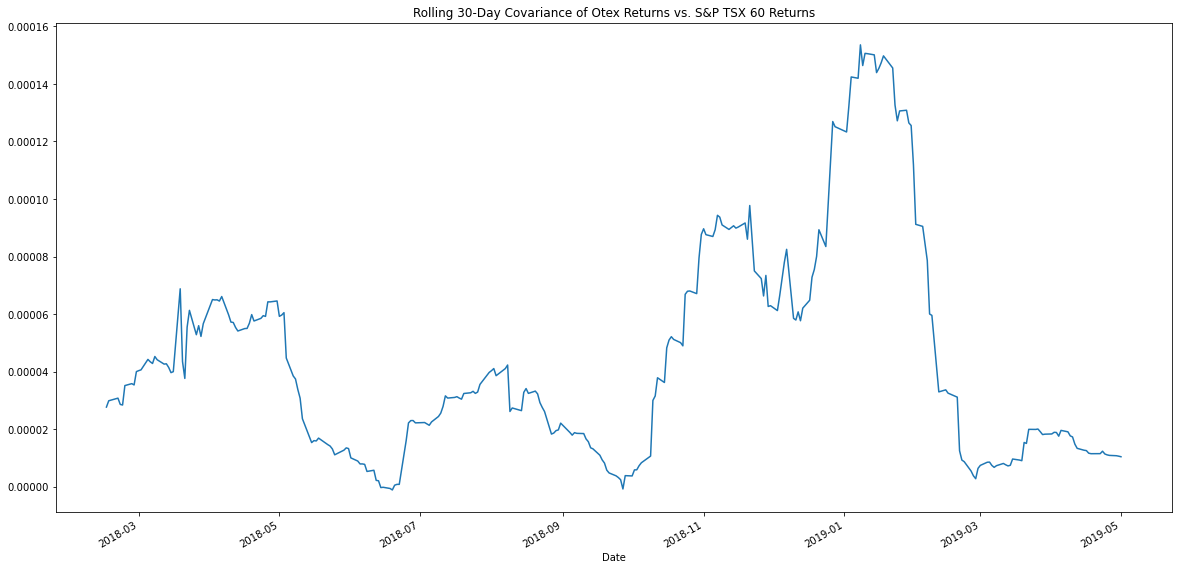

In [194]:
ovs_rolling_covariance = all_portfolio_returns['Otex'].rolling(window=30).cov(all_portfolio_returns['S&P TSX'])
ovs_rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Otex Returns vs. S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P TSX 60 Returns'}, xlabel='Date'>

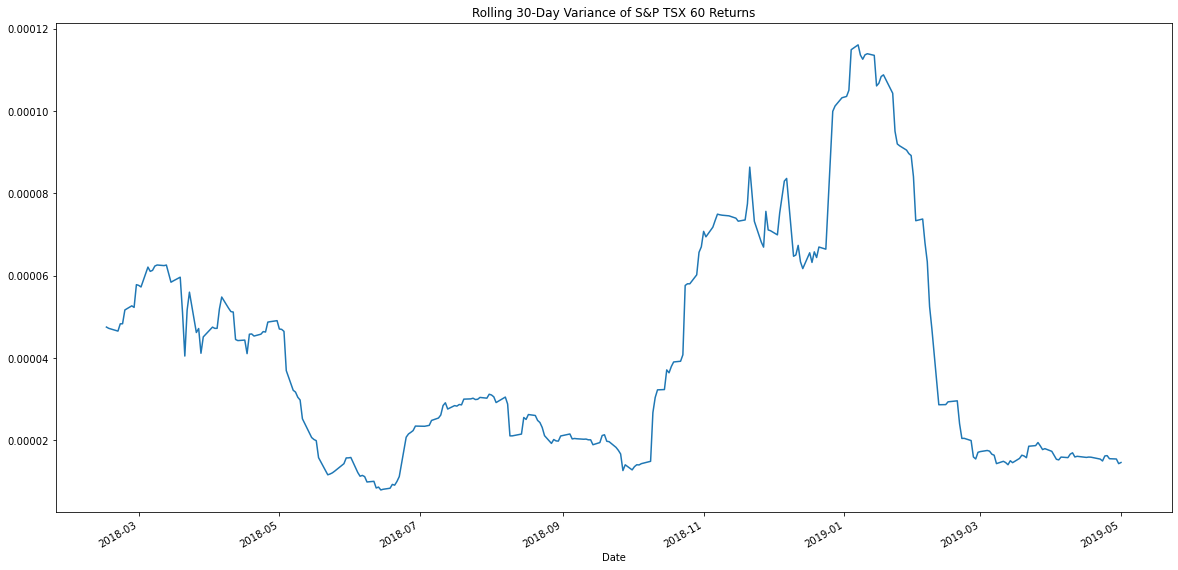

In [195]:
ovs_rolling_variance = all_portfolio_returns['S&P TSX'].rolling(window=30).var()
ovs_rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Otex'}, xlabel='Date'>

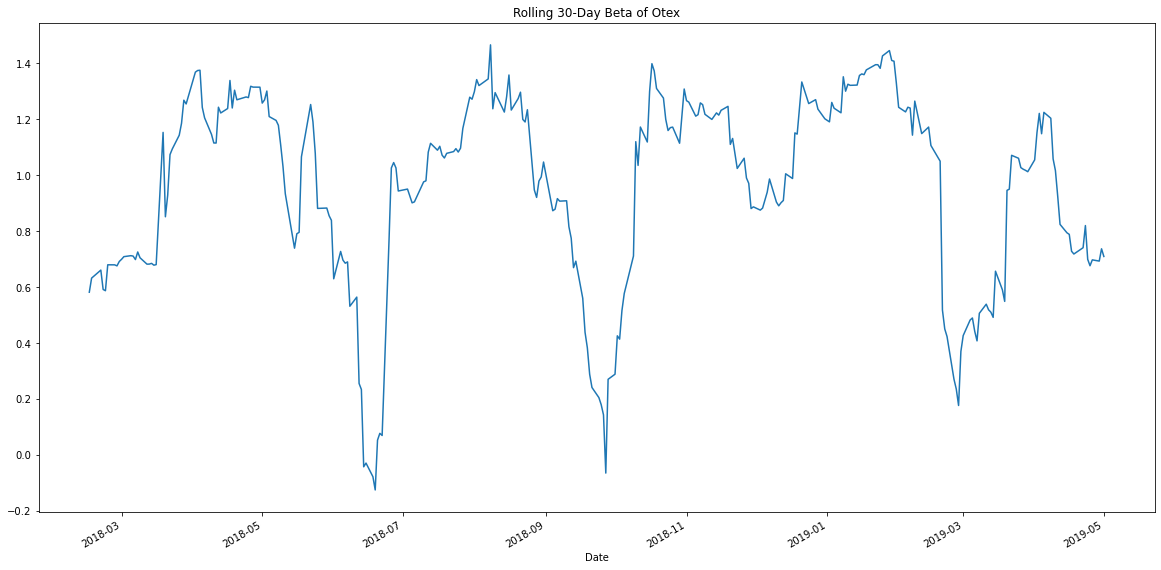

In [196]:
ovs_rolling_beta = ovs_rolling_covariance / ovs_rolling_variance
ovs_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Otex')

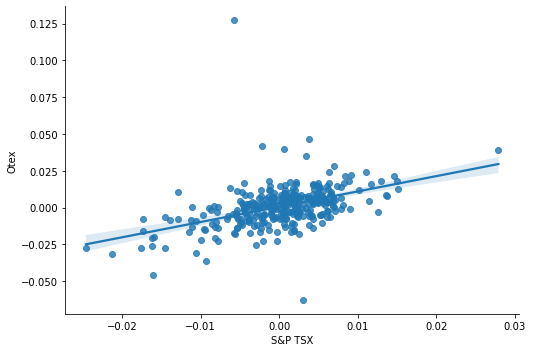

In [197]:
sns.lmplot(x='S&P TSX', y='Otex', data=all_portfolio_returns, aspect=1.5, fit_reg=True)

#### L v S&P TSX 60

In [200]:
lvs_covariance = all_portfolio_returns['L'].cov(all_portfolio_returns['S&P TSX'])
lvs_covariance

2.181019954102514e-05

In [201]:
lvs_variance = all_portfolio_returns['S&P TSX'].var()
lvs_variance

3.943325271289693e-05

In [202]:
l_beta = lvs_covariance / lvs_variance
l_beta

0.5530915671557564

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of L Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

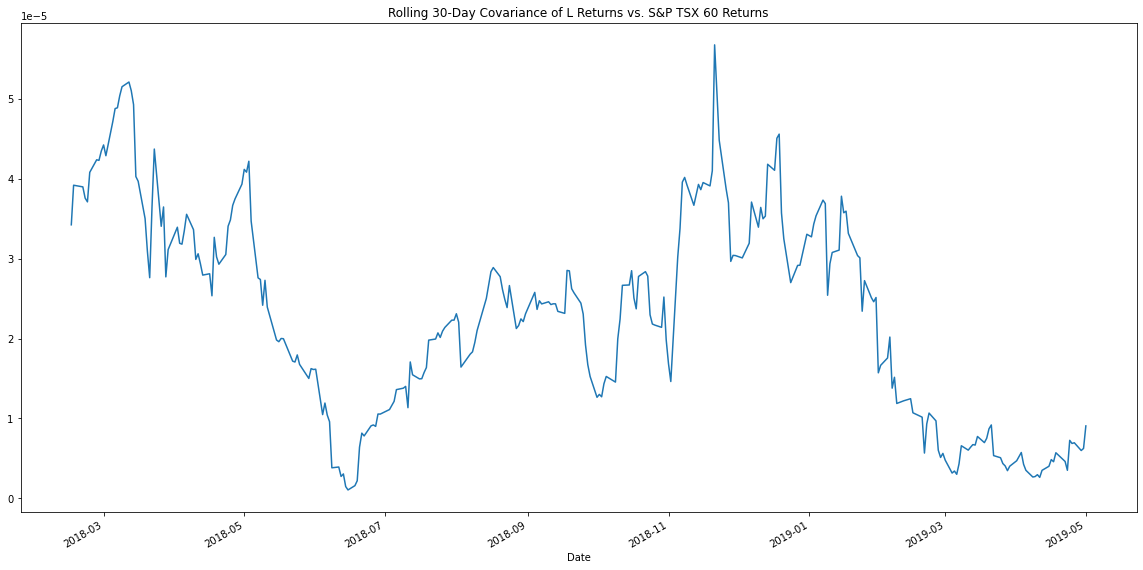

In [203]:
lvs_rolling_covariance = all_portfolio_returns['L'].rolling(window=30).cov(all_portfolio_returns['S&P TSX'])
lvs_rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of L Returns vs. S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P TSX 60 Returns'}, xlabel='Date'>

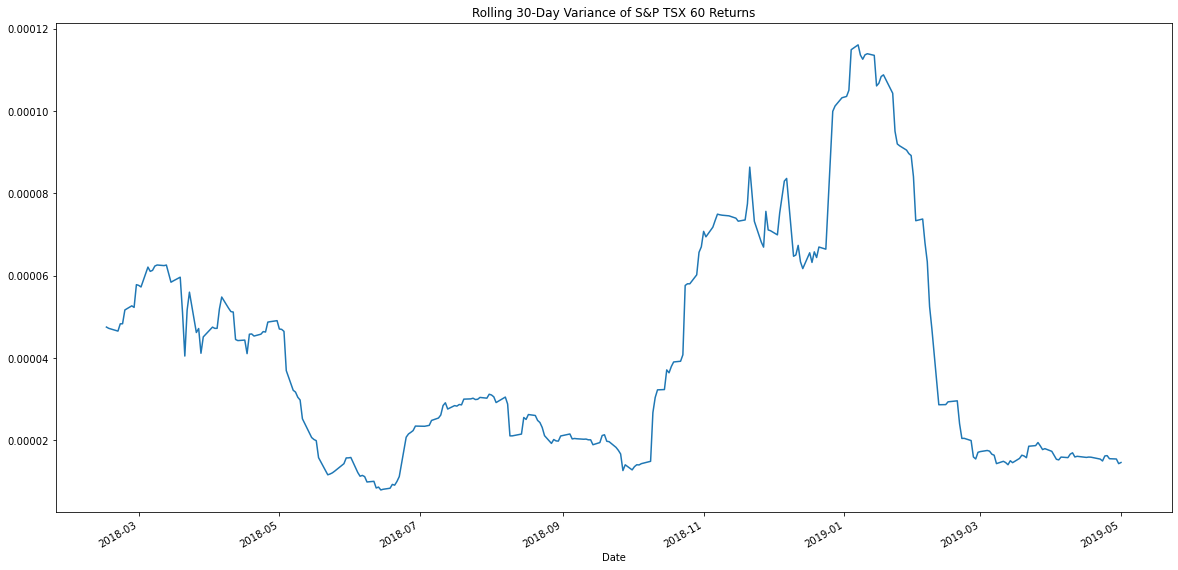

In [204]:
lvs_rolling_variance = all_portfolio_returns['S&P TSX'].rolling(window=30).var()
lvs_rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of l'}, xlabel='Date'>

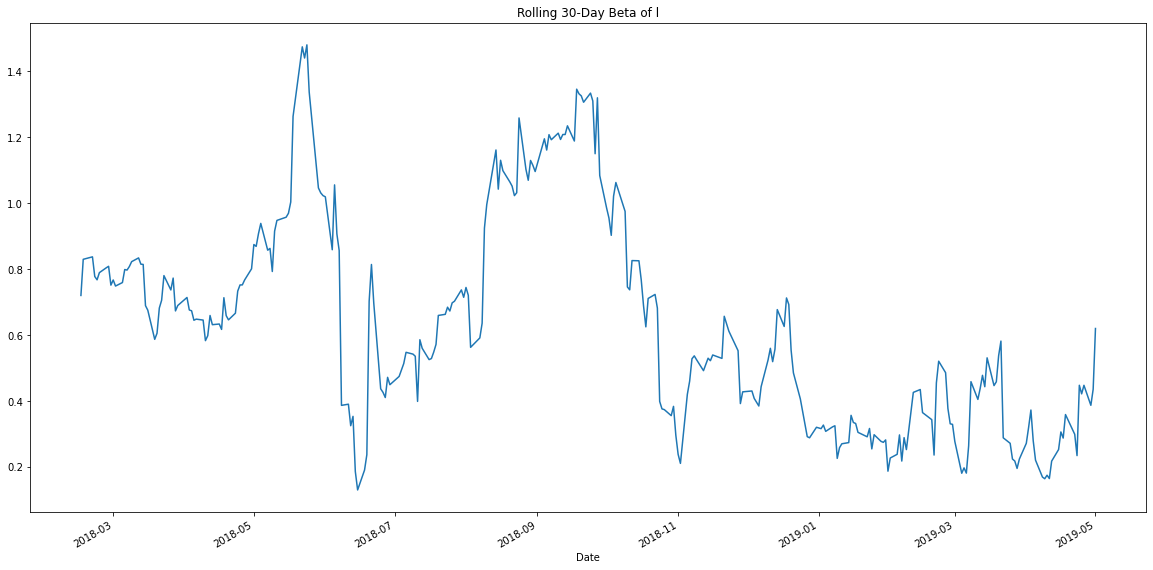

In [205]:
lvs_rolling_beta = lvs_rolling_covariance / lvs_rolling_variance
lvs_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of l')

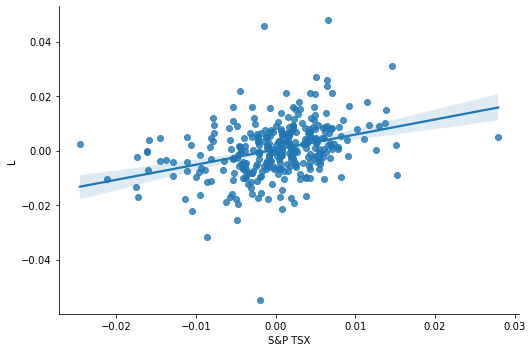

In [206]:
sns.lmplot(x='S&P TSX', y='L', data=all_portfolio_returns, aspect=1.5, fit_reg=True)

#### Shop v S&P TSX 60

In [209]:
shvs_covariance = all_portfolio_returns['Shop'].cov(all_portfolio_returns['S&P TSX'])
shvs_covariance

9.28428208357048e-05

In [210]:
shvs_variance = all_portfolio_returns['S&P TSX'].var()
shvs_variance

3.943325271289693e-05

In [211]:
shop_beta = shvs_covariance / shvs_variance
shop_beta

2.3544296868348344

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Shop Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

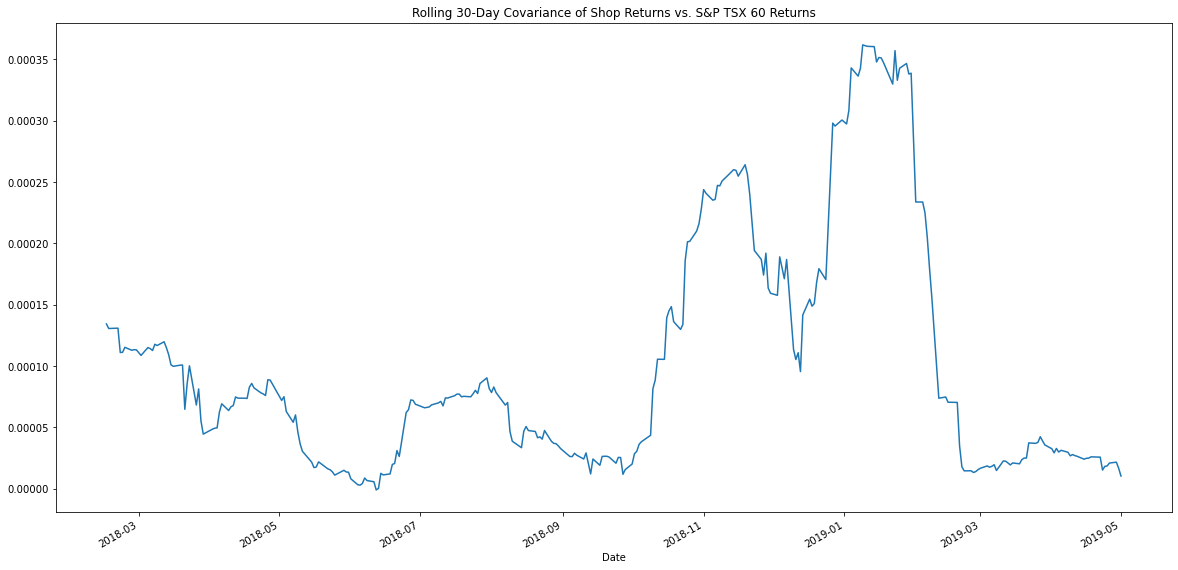

In [212]:
shvs_rolling_covariance = all_portfolio_returns['Shop'].rolling(window=30).cov(all_portfolio_returns['S&P TSX'])
shvs_rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Shop Returns vs. S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P TSX 60 Returns'}, xlabel='Date'>

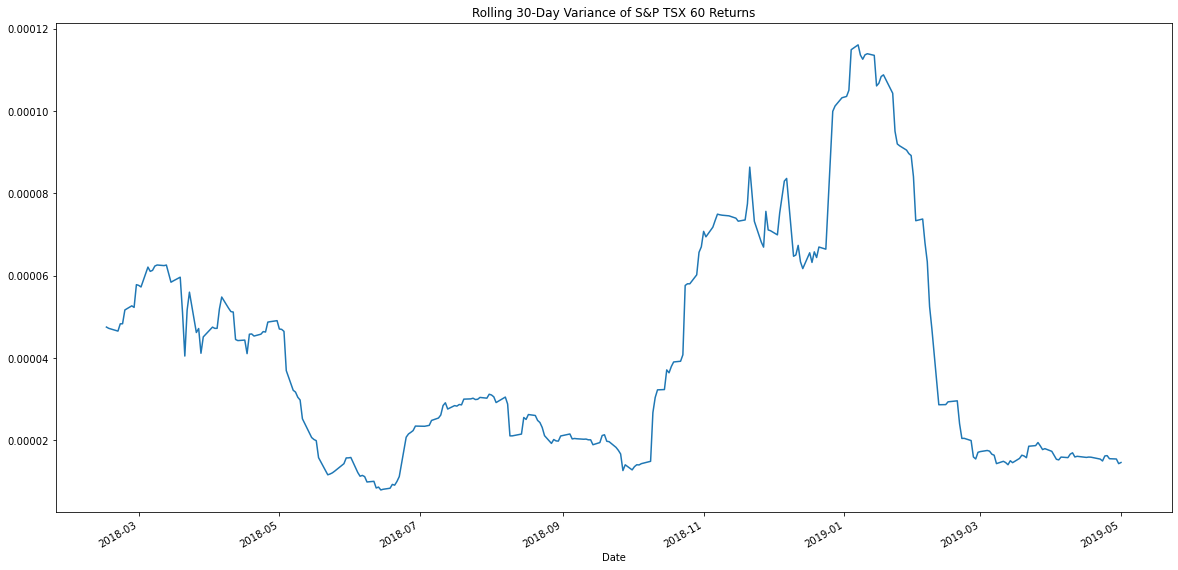

In [213]:
shvs_rolling_variance = all_portfolio_returns['S&P TSX'].rolling(window=30).var()
shvs_rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Shop'}, xlabel='Date'>

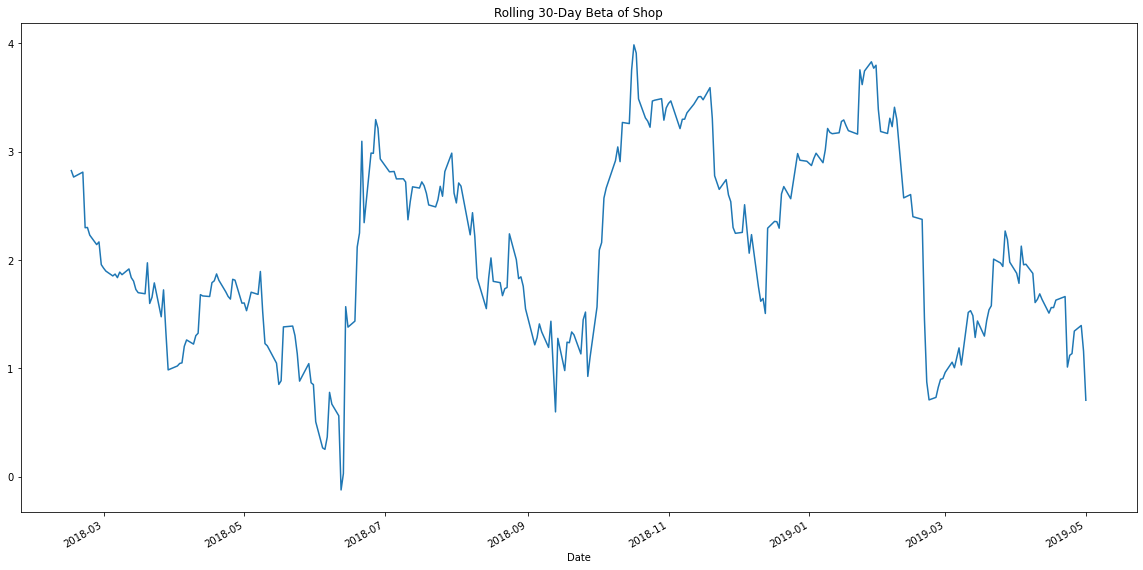

In [214]:
shvs_rolling_beta = shvs_rolling_covariance / shvs_rolling_variance
shvs_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Shop')

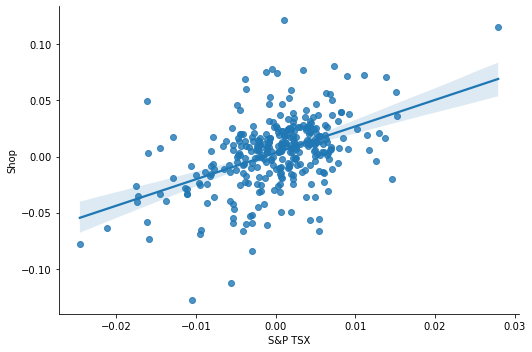

In [215]:
sns.lmplot(x='S&P TSX', y='Shop', data=all_portfolio_returns, aspect=1.5, fit_reg=True)

## Sharpe Ratios

In [216]:
comparison_sharpe_ratios = (all_portfolio_returns.mean() * 252) / (whole_annualised_std * np.sqrt(252))
comparison_sharpe_ratios

Algo 1    Algo 2  BERKSHIRE HATHAWAY INC         L      Otex  \
Date                                                                          
2018-01-03  -1.080056 -0.002831                0.031731 -0.035725 -0.054233   
2018-01-04  -1.051844 -0.005390                0.044310  2.051316 -0.170846   
2018-01-05  -0.250431 -0.003614                0.008178       inf -0.080099   
2018-01-08   0.581509 -0.035189                0.052436 -0.036637 -0.065897   
2018-01-09  -0.957573  0.011072                0.254286  0.039837 -0.891924   
...               ...       ...                     ...       ...       ...   
2019-04-25   1.408823  0.003194                0.037154  0.048296  0.101964   
2019-04-26   0.322519 -0.004404                0.017262 -0.097307  0.820788   
2019-04-29   0.184617 -0.008181                0.034483  0.122463 -0.102678   
2019-04-30  -0.326601  0.014747               -0.048654  0.072925  0.653077   
2019-05-01  10.258803  0.003146               -0.022994 -0.018178  0.192268   

            PAULSON & CO.INC.  PAULSON & CO.INC.    S&P TSX  \
Date                                                          
2018-01-03                NaN                 NaN  0.001876   
2018-01-04                NaN                 NaN  0.002801   
2018-01-05                NaN                 NaN -0.001830   
2018-01-08                NaN                 NaN -0.003642   
2018-01-09                NaN                 NaN  0.072672   
...                       ...                 ...       ...   
2019-04-25                NaN                 NaN -0.011272   
2019-04-26                NaN                 NaN  0.003142   
2019-04-29                NaN                 NaN -0.008987   
2019-04-30                NaN                 NaN -0.005985   
2019-05-01                NaN                 NaN -0.001506   

            SOROS FUND MANAGEMENT LLC      Shop  TIGER GLOBAL MANAGEMENT LLC  
Date                                                                          
2018-01-03                  -0.011150  0.144358                    -0.624913  
2018-01-04                   0.056797  0.197620                    -0.115109  
2018-01-05                  -0.012755 -2.321525                    -1.678468  
2018-01-08                  -0.011612  0.206058                    -0.243181  
2018-01-09                   0.050543 -0.300146                    -0.691192  
...                               ...       ...                          ...  
2019-04-25                   0.182303 -1.042633                     0.239969  
2019-04-26                  -0.006373  0.267476                    -0.100090  
2019-04-29                  -0.041403  0.256417                    -0.197834  
2019-04-30                   0.040118  0.045072                     4.769859  
2019-05-01                   0.008882  0.209581                     0.155815  

[322 rows x 11 columns]

<AxesSubplot:title={'center':'Sharpe Ratios for All Portfolios'}, xlabel='Date'>

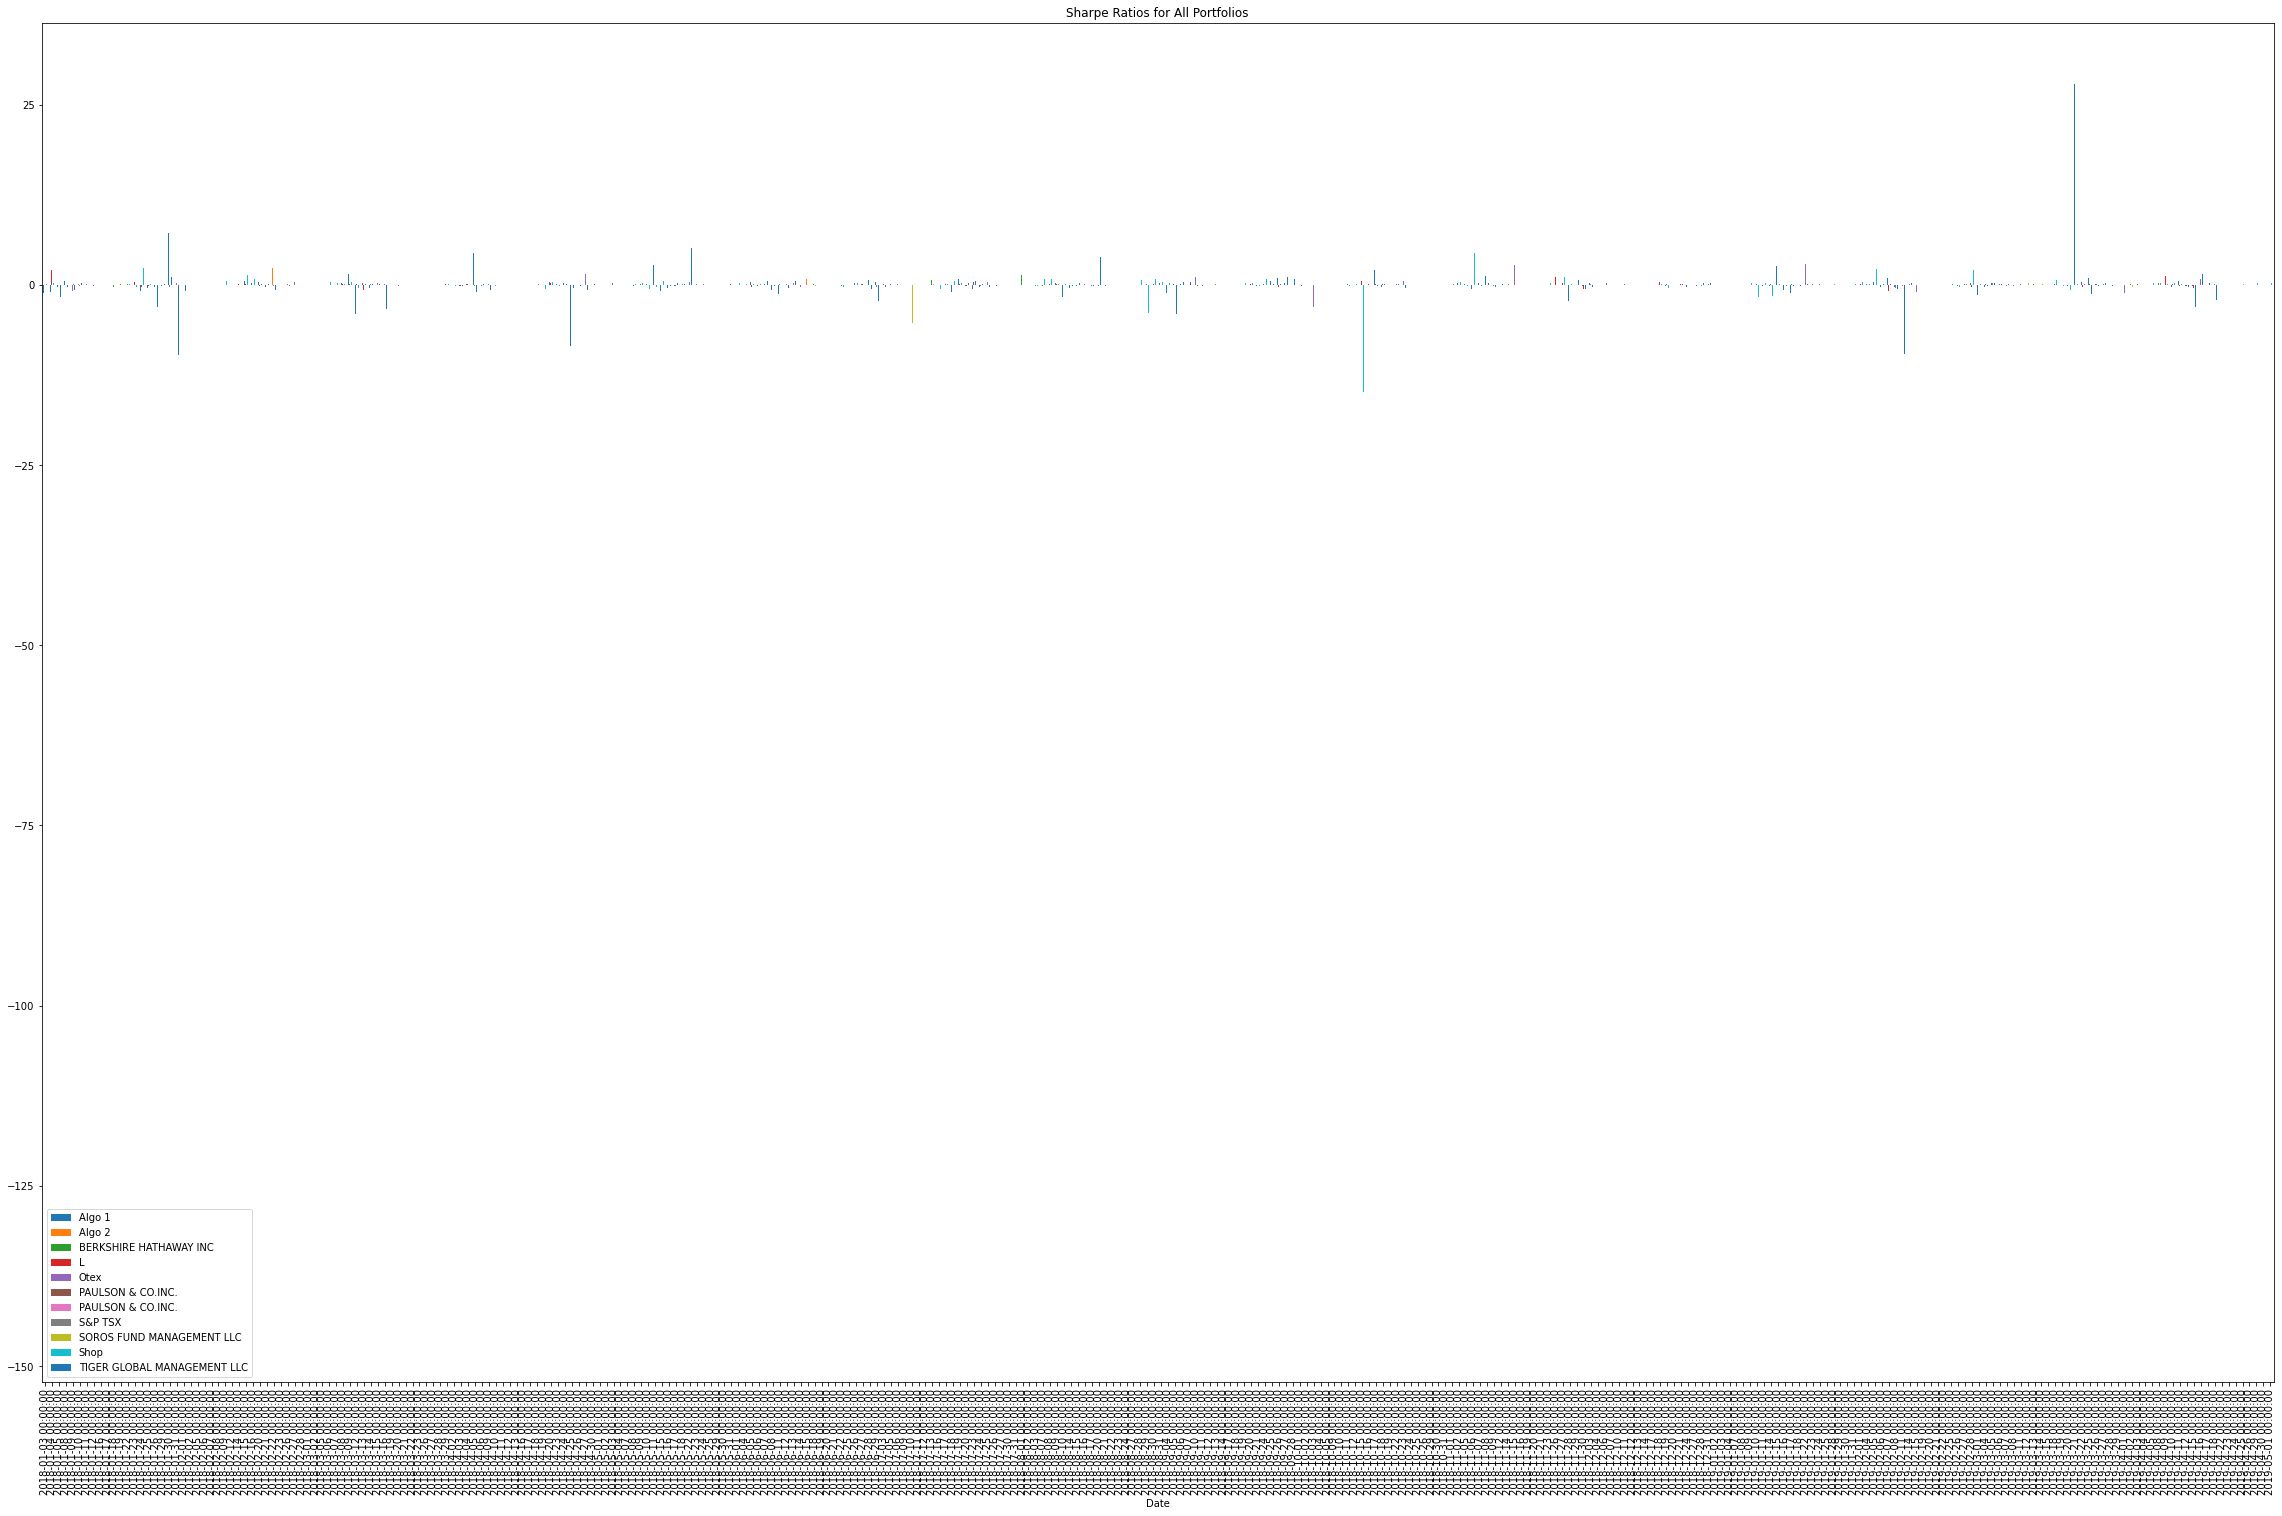

In [217]:
comparison_sharpe_ratios.plot.bar(figsize=(40,25), title="Sharpe Ratios for All Portfolios")

##### From the findings observable in the "Create a Custom Portfolio", it is evident to suggest that Otex is most comparable individual returns of the Portfolio in conjuction with the S&P TSX 60, as stocks with a value greater than 1 are more volatile than the market (meaning they will generally imitate the market). Stocks with a beta of less than 1 are more muted than the market's (meaning they will generally have less correlation with the market). However, positive beta values which surpasses 1 suggests that the stock is more volatile than the market. Therefore it is noticeable that of the 3 individual stocks, Otex had a beta value of '1.0385812033607549', which provides evidence that it is more closelsy related to the S&P TSX, with L beta value of '0.5530915671557564' and Shop beta value of '2.3544296868348344'. This argument is supported in points recorded in the determination above that suggested that Algo 2, Tigers and Soros individual stocks closely resembled that of the S&P TSX, with respective beta values of '1.0483223090410732', '0.9799269927989295' and '1.0164347839004906'. In addition, the Beta vs Coreelation scatter plots further supports this argument, as the individual stocks present a compact plot, with values close to the linear regression line. Unlike the individual stocks which do not, with very scattered values, which affirms those stocks incomparability.